# Evaluate MQA performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
label_df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
label_df.head()

Model  GDT_TS  GDT_HA  TMscore  Global_LDDT  \
0  model_1_ptm_seed_0_rec_10_ens_1   0.962   0.869    0.687        0.872   
1  model_1_ptm_seed_0_rec_10_ens_8   0.961   0.863    0.679        0.873   
2   model_1_ptm_seed_0_rec_1_ens_1   0.968   0.889    0.708        0.874   
3   model_1_ptm_seed_0_rec_1_ens_8   0.967   0.882    0.702        0.874   
4   model_1_ptm_seed_0_rec_2_ens_1   0.965   0.878    0.697        0.872   

   Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  Length      id  \
0      0.868  0.961     0.895      0.059  model_1_ptm  ...     291  6EW1_A   
1      0.869  0.962     0.896      0.017  model_1_ptm  ...     291  6EW1_A   
2      0.870  0.957     0.895     29.472  model_1_ptm  ...     291  6EW1_A   
3      0.871  0.957     0.895     29.592  model_1_ptm  ...     291  6EW1_A   
4      0.868  0.959     0.895      0.492  model_1_ptm  ...     291  6EW1_A   

   resolution           releasedate  \
0       2.472  2021-04-07T00:00:00Z   
1       2.472  2021-04-07T00:00:00Z   
2       2.472  2021-04-07T00:00:00Z   
3       2.472  2021-04-07T00:00:00Z   
4       2.472  2021-04-07T00:00:00Z   

                                      header  \
0  >6ew1_A mol:protein length:291  Filamin-A   
1  >6ew1_A mol:protein length:291  Filamin-A   
2  >6ew1_A mol:protein length:291  Filamin-A   
3  >6ew1_A mol:protein length:291  Filamin-A   
4  >6ew1_A mol:protein length:291  Filamin-A   

                                            sequence  length  \
0  SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...     291   
1  SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...     291   
2  SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...     291   
3  SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...     291   
4  SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...     291   

  num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude is_similar_AF2  
0                    2                                    1           True  
1                    2                                    1           True  
2                    2                                    1           True  
3                    2                                    1           True  
4                    2                                    1           True  

[5 rows x 26 columns]

In [4]:
mqa_dfs = []
for csv in score_dir.glob('*.csv'):
    if csv.stem == 'label':
        continue
    df = pd.read_csv(csv, index_col=0)
    mqa_dfs.append(df)
mqa_df = pd.concat(mqa_dfs, axis=1)
mqa_df = mqa_df.loc[:,~mqa_df.columns.duplicated()]
mqa_df['DOPE'] = - mqa_df['DOPE']
mqa_df['SOAP'] = - mqa_df['SOAP']
mqa_df

Model  P3CMQA  Target      DOPE       SOAP  \
0    model_1_ptm_seed_0_rec_10_ens_1   0.986  6EW1_A 27979.010 266764.281   
1    model_1_ptm_seed_0_rec_10_ens_8   0.987  6EW1_A 28100.068 270022.719   
2     model_1_ptm_seed_0_rec_1_ens_1   0.985  6EW1_A 28048.314 265679.812   
3     model_1_ptm_seed_0_rec_1_ens_8   0.986  6EW1_A 28083.600 265400.312   
4     model_1_ptm_seed_0_rec_2_ens_1   0.986  6EW1_A 28017.303 267012.375   
..                               ...     ...     ...       ...        ...   
195       model_5_seed_1_rec_5_ens_1   0.852  7MJW_A 53381.055 300478.594   
196       model_5_seed_1_rec_6_ens_1   0.853  7MJW_A 53414.750 302137.188   
197       model_5_seed_1_rec_7_ens_1   0.850  7MJW_A 53447.066 303244.719   
198       model_5_seed_1_rec_8_ens_1   0.850  7MJW_A 53361.305 301926.594   
199       model_5_seed_1_rec_9_ens_1   0.852  7MJW_A 53534.082 304900.844   

     VoroCNN  DeepAccNet  DeepAccNet-Bert  
0      0.652       0.975            0.961  
1      0.652       0.974            0.986  
2      0.654       0.946            0.960  
3      0.653       0.947            0.899  
4      0.656       0.966            0.953  
..       ...         ...              ...  
195    0.672       0.950            0.998  
196    0.676       0.956            0.999  
197    0.676       0.947            0.998  
198    0.674       0.949            0.998  
199    0.673       0.937            0.998  

[36000 rows x 8 columns]

In [5]:
df = pd.merge(label_df, mqa_df, on=['Target', 'Model'], how='left')
df

Model  GDT_TS  GDT_HA  TMscore  Global_LDDT  \
0      model_1_ptm_seed_0_rec_10_ens_1   0.962   0.869    0.687        0.872   
1      model_1_ptm_seed_0_rec_10_ens_8   0.961   0.863    0.679        0.873   
2       model_1_ptm_seed_0_rec_1_ens_1   0.968   0.889    0.708        0.874   
3       model_1_ptm_seed_0_rec_1_ens_8   0.967   0.882    0.702        0.874   
4       model_1_ptm_seed_0_rec_2_ens_1   0.965   0.878    0.697        0.872   
...                                ...     ...     ...      ...          ...   
35795       model_5_seed_1_rec_5_ens_1   0.989   0.962    0.848        0.923   
35796       model_5_seed_1_rec_6_ens_1   0.989   0.960    0.844        0.924   
35797       model_5_seed_1_rec_7_ens_1   0.989   0.960    0.842        0.923   
35798       model_5_seed_1_rec_8_ens_1   0.989   0.961    0.844        0.923   
35799       model_5_seed_1_rec_9_ens_1   0.989   0.961    0.846        0.922   

       Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  length  \
0          0.868  0.961     0.895      0.059  model_1_ptm  ...     291   
1          0.869  0.962     0.896      0.017  model_1_ptm  ...     291   
2          0.870  0.957     0.895     29.472  model_1_ptm  ...     291   
3          0.871  0.957     0.895     29.592  model_1_ptm  ...     291   
4          0.868  0.959     0.895      0.492  model_1_ptm  ...     291   
...          ...    ...       ...        ...          ...  ...     ...   
35795      0.919  0.928       NaN      0.869      model_5  ...     457   
35796      0.920  0.930       NaN      0.396      model_5  ...     457   
35797      0.919  0.930       NaN      0.141      model_5  ...     457   
35798      0.920  0.930       NaN      0.152      model_5  ...     457   
35799      0.918  0.925       NaN      0.212      model_5  ...     457   

       num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude  \
0                         2                                    1   
1                         2                                    1   
2                         2                                    1   
3                         2                                    1   
4                         2                                    1   
...                     ...                                  ...   
35795                     7                                    7   
35796                     7                                    7   
35797                     7                                    7   
35798                     7                                    7   
35799                     7                                    7   

      is_similar_AF2  P3CMQA      DOPE       SOAP VoroCNN  DeepAccNet  \
0               True   0.986 27979.010 266764.281   0.652       0.975   
1               True   0.987 28100.068 270022.719   0.652       0.974   
2               True   0.985 28048.314 265679.812   0.654       0.946   
3               True   0.986 28083.600 265400.312   0.653       0.947   
4               True   0.986 28017.303 267012.375   0.656       0.966   
...              ...     ...       ...        ...     ...         ...   
35795          False   0.852 53381.055 300478.594   0.672       0.950   
35796          False   0.853 53414.750 302137.188   0.676       0.956   
35797          False   0.850 53447.066 303244.719   0.676       0.947   
35798          False   0.850 53361.305 301926.594   0.674       0.949   
35799          False   0.852 53534.082 304900.844   0.673       0.937   

      DeepAccNet-Bert  
0               0.961  
1               0.986  
2               0.960  
3               0.899  
4               0.953  
...               ...  
35795           0.998  
35796           0.999  
35797           0.998  
35798           0.998  
35799           0.998  

[35800 rows x 32 columns]

In [6]:
import sys
sys.path.append('../../../../mqa')
from eval import eval, stat_test

In [7]:
mqa_df.columns

Index(['Model', 'P3CMQA', 'Target', 'DOPE', 'SOAP', 'VoroCNN', 'DeepAccNet',
       'DeepAccNet-Bert'],
      dtype='object')

In [8]:
# Against gdtts
mqa_methods = list(set(mqa_df.columns) - set(['Target', 'Model']))
methods = mqa_methods + ['pLDDT', 'pTMscore']
label = 'GDT_TS'
result_df = eval(df, methods, label_name=label).sort_values(f'{label} Pearson')
result_df = result_df.sort_values('Method')
random_loss = df.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
result_df

97


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0             DOPE           0.150            0.119        1.458         NaN
1       DeepAccNet           0.142            0.111        1.526       0.077
2  DeepAccNet-Bert           0.102            0.089        1.842       0.080
3           P3CMQA           0.117            0.095        2.096       0.150
4             SOAP           0.126            0.119        1.647         NaN
5          VoroCNN           0.063            0.047        1.953       0.294
6            pLDDT           0.201            0.158        1.441       0.072
7         pTMscore           0.221            0.204        1.529       0.118
8  Random seletion             NaN              NaN        2.072         NaN

In [9]:
# Against gdtts
methods = list(set(mqa_df.columns) - set(['Target', 'Model'])) + ['pLDDT', 'pTMscore']
label = 'GDT_TS'
for name, group in df.groupby('is_similar_AF2'):
    print(name)
    result_df = eval(group, methods, label_name=label).sort_values(f'{label} Pearson')
    result_df = result_df.sort_values('Method')
    random_loss = df.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
    result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
    display(result_df)

False
49


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0             DOPE           0.217            0.176        1.460         NaN
1       DeepAccNet           0.230            0.190        1.214       0.087
2  DeepAccNet-Bert           0.174            0.145        2.018       0.088
3           P3CMQA           0.075            0.046        2.612       0.175
4             SOAP           0.117            0.093        2.301         NaN
5          VoroCNN           0.035            0.018        2.521       0.279
6            pLDDT           0.194            0.137        1.320       0.082
7         pTMscore           0.187            0.164        1.982       0.120
8  Random seletion             NaN              NaN        2.072         NaN

True
48


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0             DOPE           0.080            0.060        1.457         NaN
1       DeepAccNet           0.052            0.030        1.846       0.067
2  DeepAccNet-Bert           0.029            0.032        1.663       0.072
3           P3CMQA           0.161            0.146        1.569       0.125
4             SOAP           0.135            0.145        0.979         NaN
5          VoroCNN           0.091            0.078        1.373       0.309
6            pLDDT           0.207            0.179        1.565       0.062
7         pTMscore           0.256            0.246        1.067       0.116
8  Random seletion             NaN              NaN        2.072         NaN

In [10]:
# Against mean lddt
methods = list(set(mqa_df.columns) - set(['Target', 'Model'])) + ['pLDDT', 'pTMscore']
label = 'Mean_LDDT'
random_loss = df.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean()
result_df = eval(df, methods, label_name=label).sort_values(f'{label} Pearson')
result_df = result_df.sort_values('Method')
random_loss = df.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
result_df

88


Method  Mean_LDDT Pearson  Mean_LDDT Spearman  Mean_LDDT Loss  \
0             DOPE              0.245               0.213           1.238   
1       DeepAccNet              0.163               0.139           1.135   
2  DeepAccNet-Bert              0.158               0.141           1.292   
3           P3CMQA              0.150               0.128           1.518   
4             SOAP              0.232               0.219           1.211   
5          VoroCNN              0.075               0.055           1.541   
6            pLDDT              0.337               0.295           1.047   
7         pTMscore              0.339               0.318           1.274   
8  Random seletion                NaN                 NaN           1.662   

   Mean_LDDT MAE  
0            NaN  
1          0.088  
2          0.093  
3          0.099  
4            NaN  
5          0.227  
6          0.043  
7          0.073  
8            NaN

In [11]:
# Against gdtts
methods = list(set(mqa_df.columns) - set(['Target', 'Model'])) + ['pLDDT', 'pTMscore']
label = 'Mean_LDDT'
for name, group in df.groupby('is_similar_AF2'):
    print(name)
    result_df = eval(group, methods, label_name=label).sort_values(f'{label} Pearson')
    result_df = result_df.sort_values('Method')
    random_loss = df.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
    result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
    display(result_df)

False
43


Method  Mean_LDDT Pearson  Mean_LDDT Spearman  Mean_LDDT Loss  \
0             DOPE              0.244               0.233           1.451   
1       DeepAccNet              0.199               0.172           1.037   
2  DeepAccNet-Bert              0.173               0.152           1.323   
3           P3CMQA              0.106               0.093           1.635   
4             SOAP              0.167               0.156           1.536   
5          VoroCNN              0.034               0.025           2.004   
6            pLDDT              0.274               0.234           1.018   
7         pTMscore              0.253               0.219           1.453   
8  Random seletion                NaN                 NaN           1.662   

   Mean_LDDT MAE  
0            NaN  
1          0.100  
2          0.103  
3          0.115  
4            NaN  
5          0.218  
6          0.048  
7          0.091  
8            NaN

True
45


Method  Mean_LDDT Pearson  Mean_LDDT Spearman  Mean_LDDT Loss  \
0             DOPE              0.246               0.193           1.034   
1       DeepAccNet              0.130               0.108           1.228   
2  DeepAccNet-Bert              0.142               0.131           1.263   
3           P3CMQA              0.192               0.160           1.405   
4             SOAP              0.295               0.279           0.900   
5          VoroCNN              0.114               0.084           1.098   
6            pLDDT              0.397               0.355           1.075   
7         pTMscore              0.422               0.412           1.103   
8  Random seletion                NaN                 NaN           1.662   

   Mean_LDDT MAE  
0            NaN  
1          0.077  
2          0.084  
3          0.084  
4            NaN  
5          0.236  
6          0.039  
7          0.056  
8            NaN

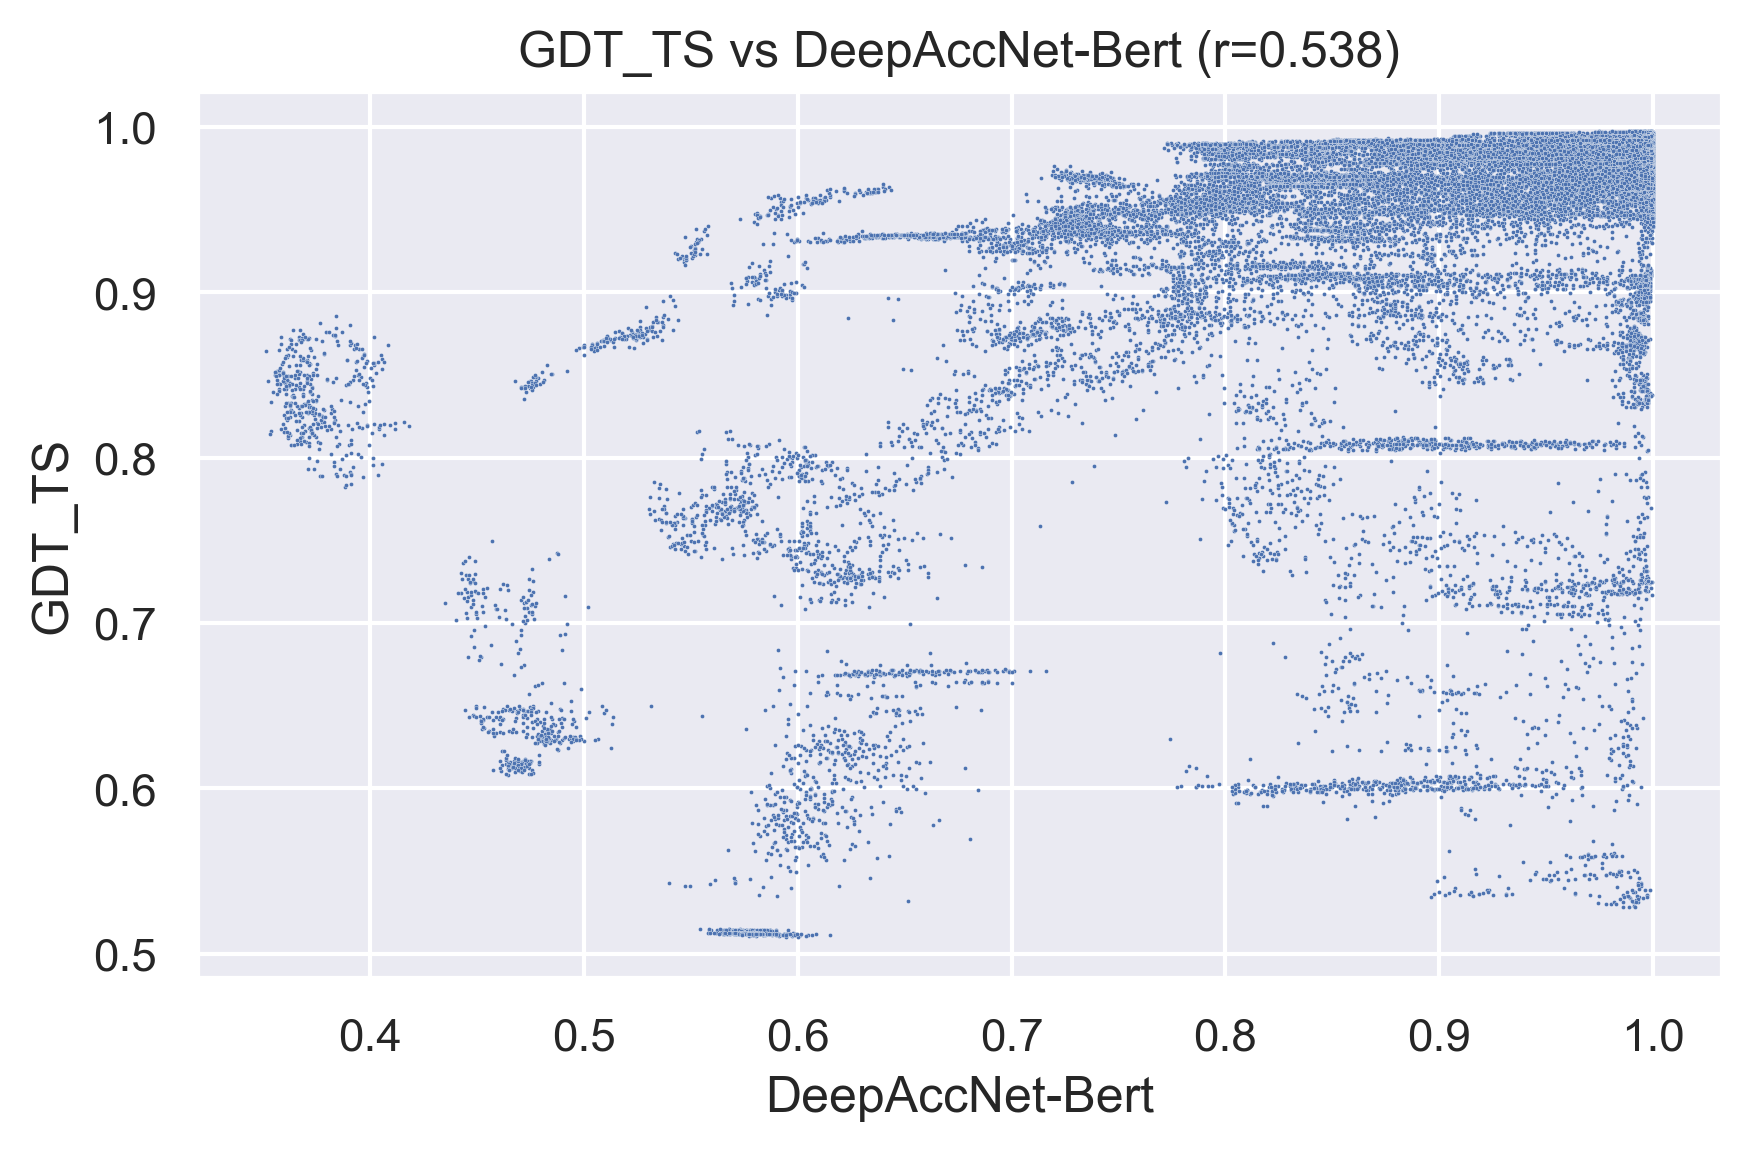

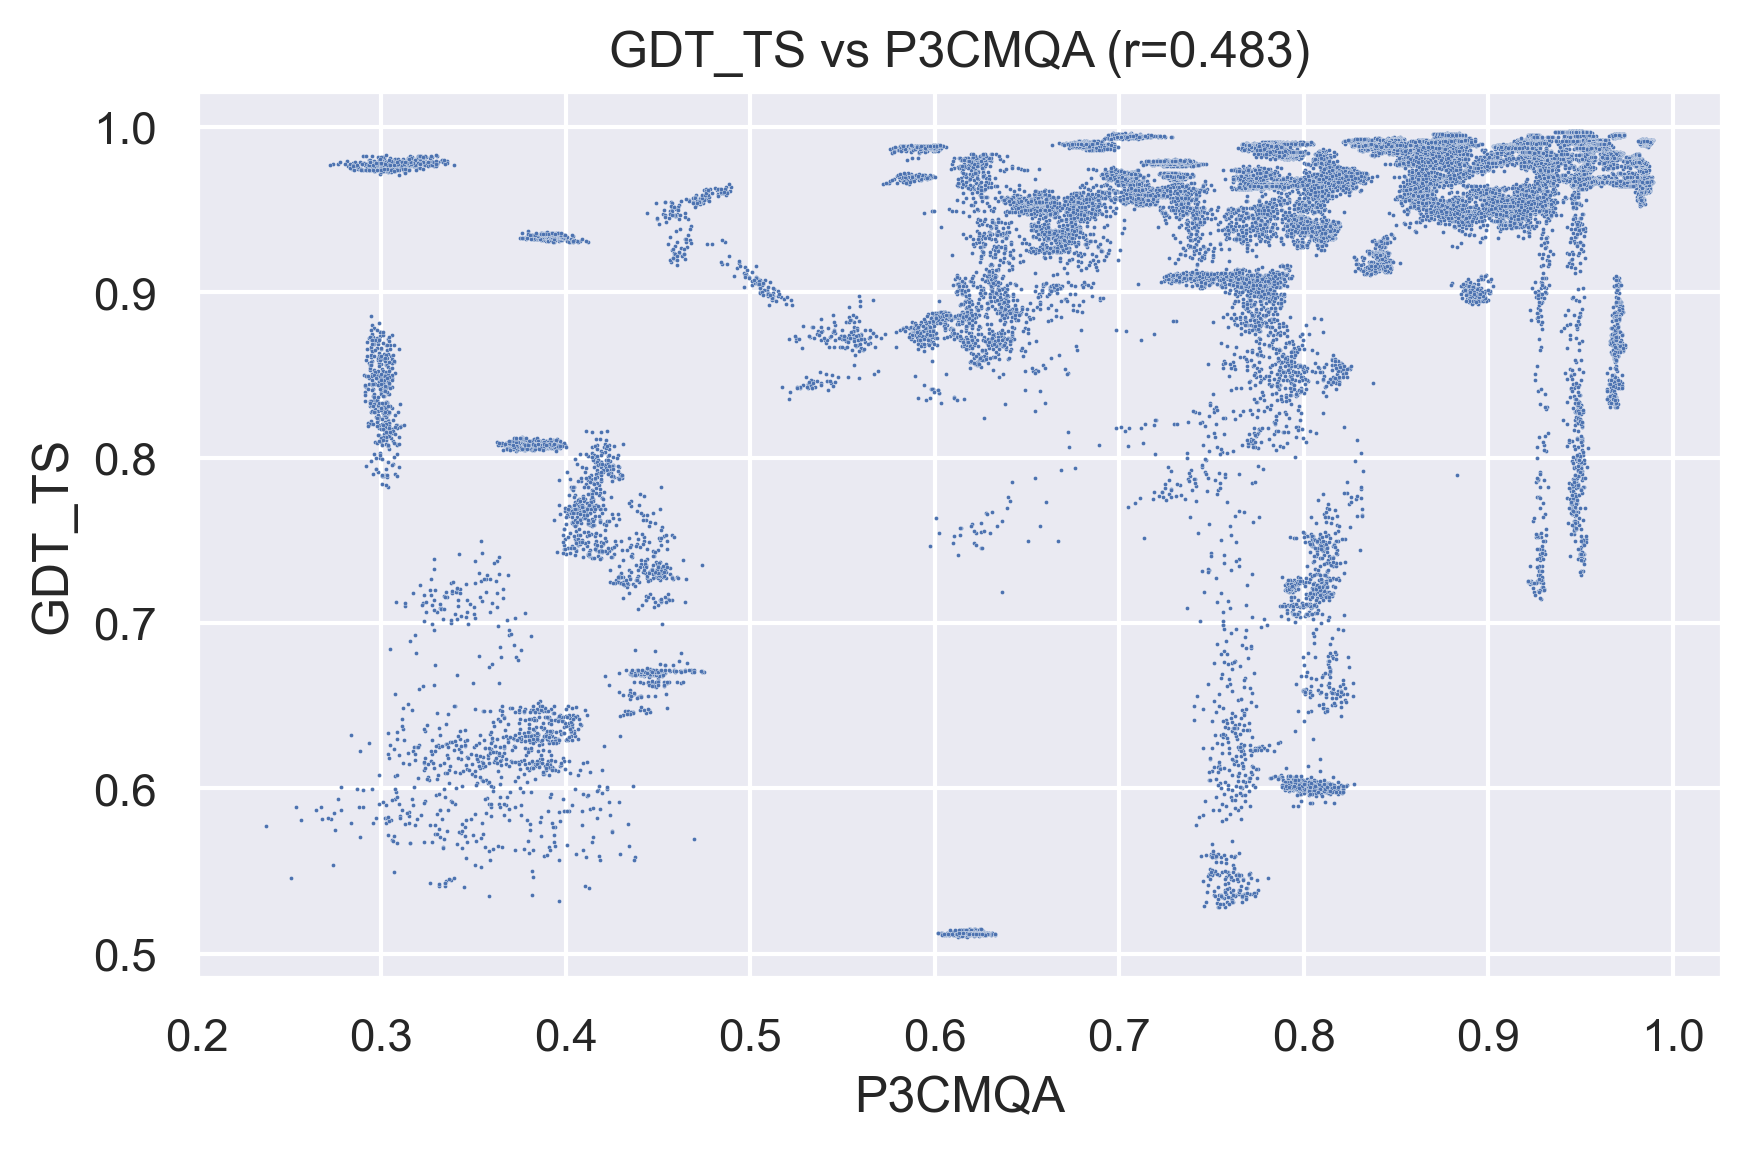

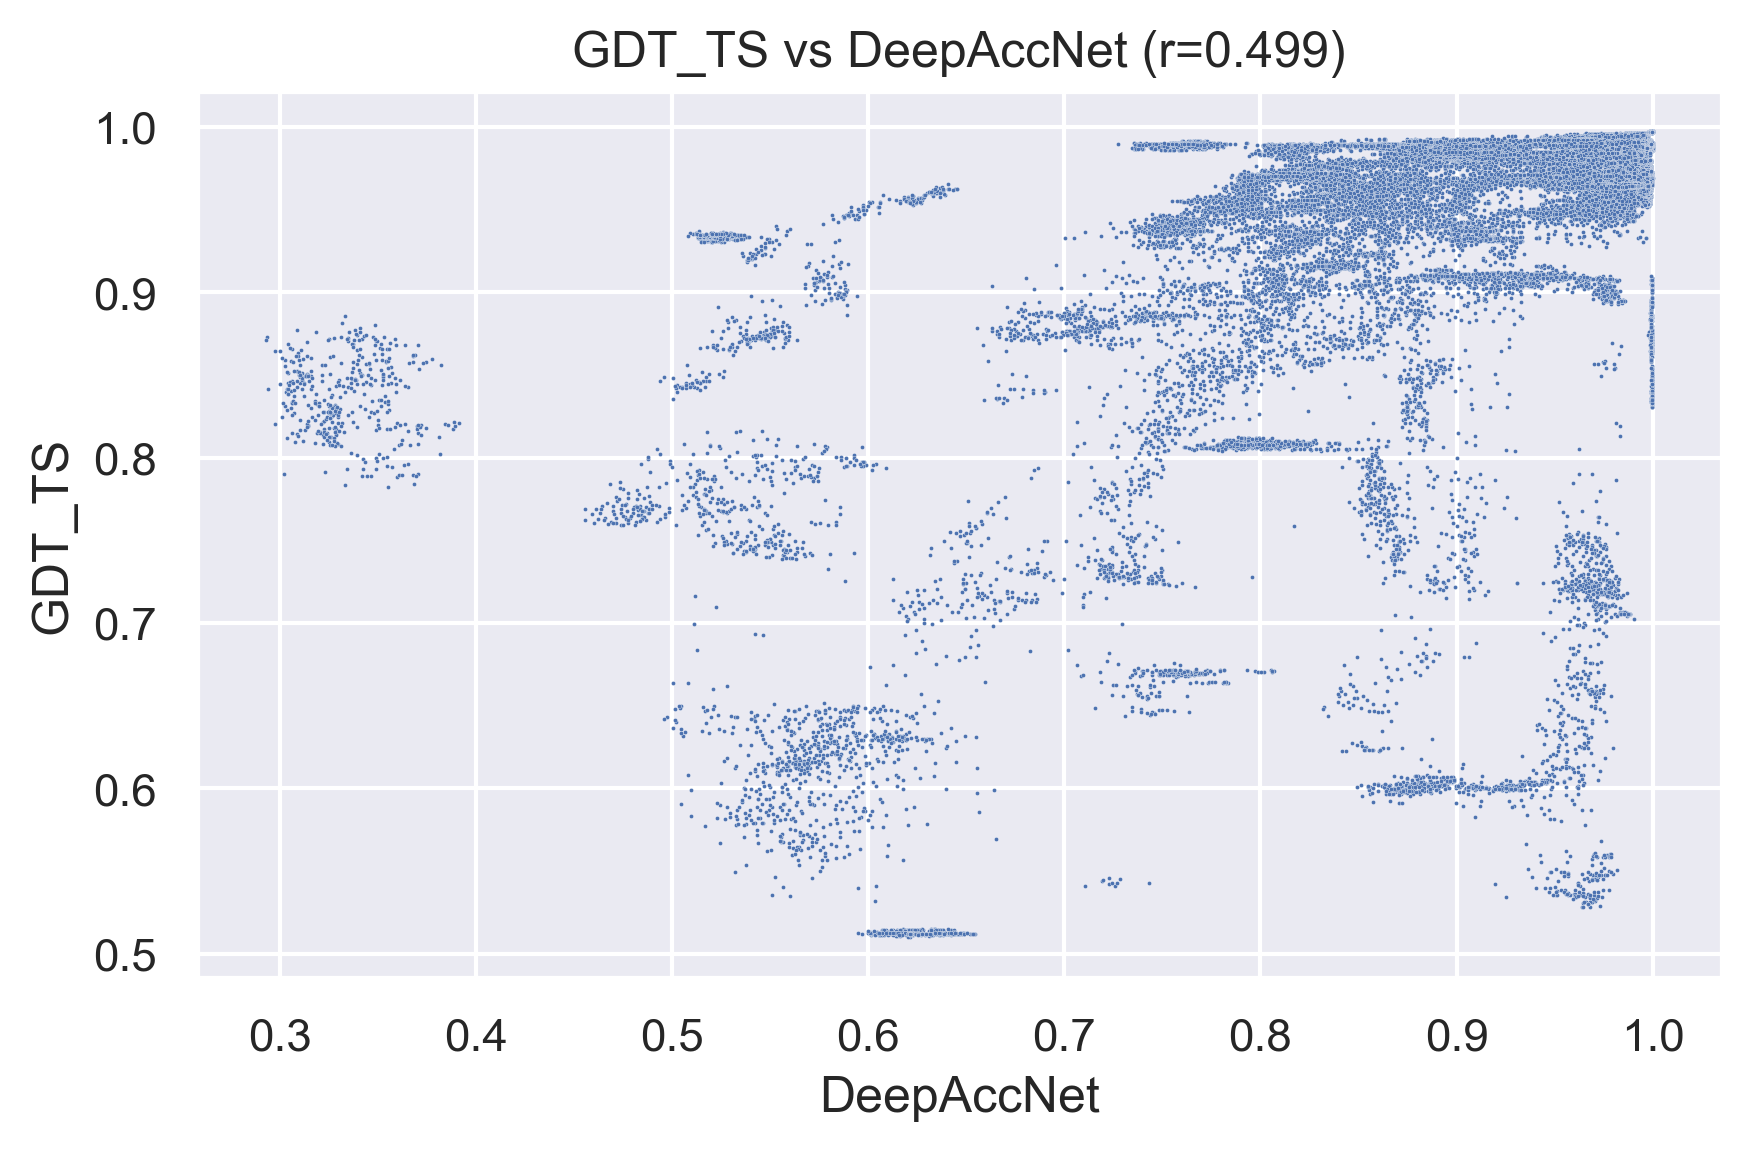

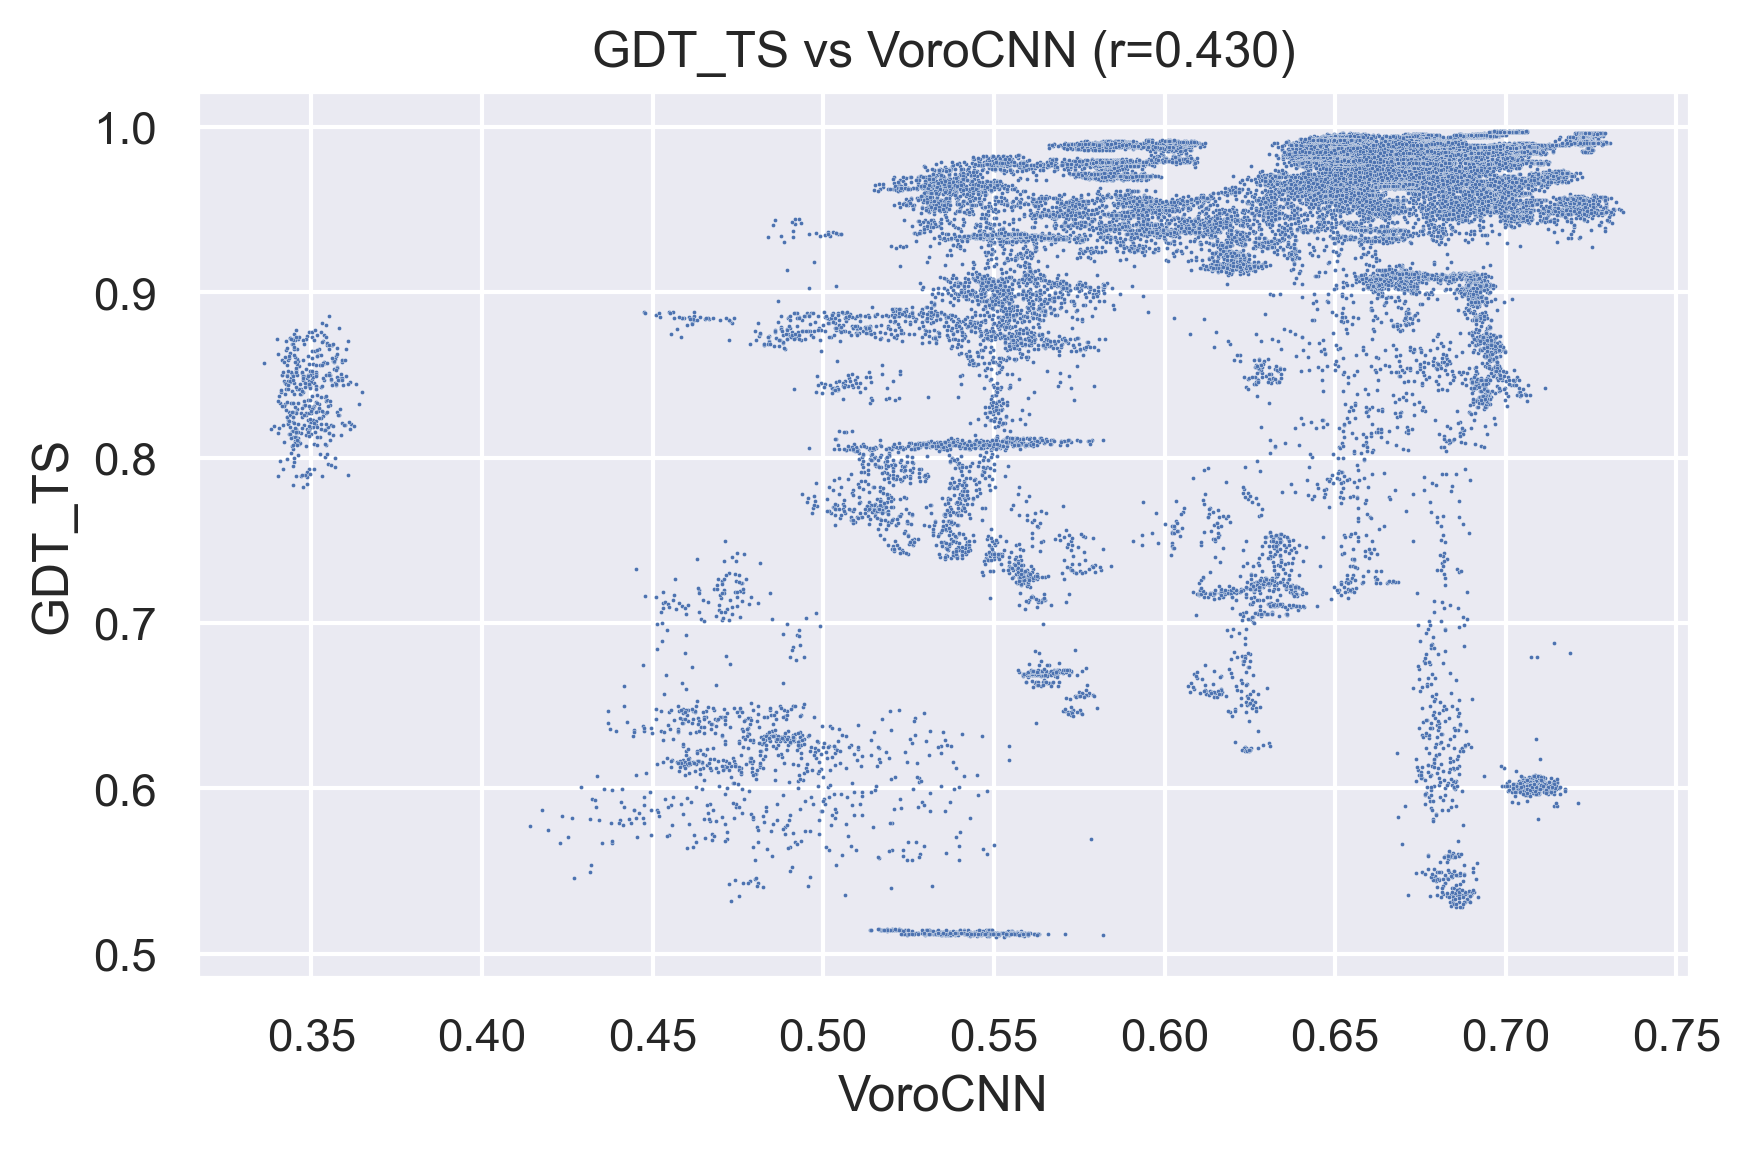

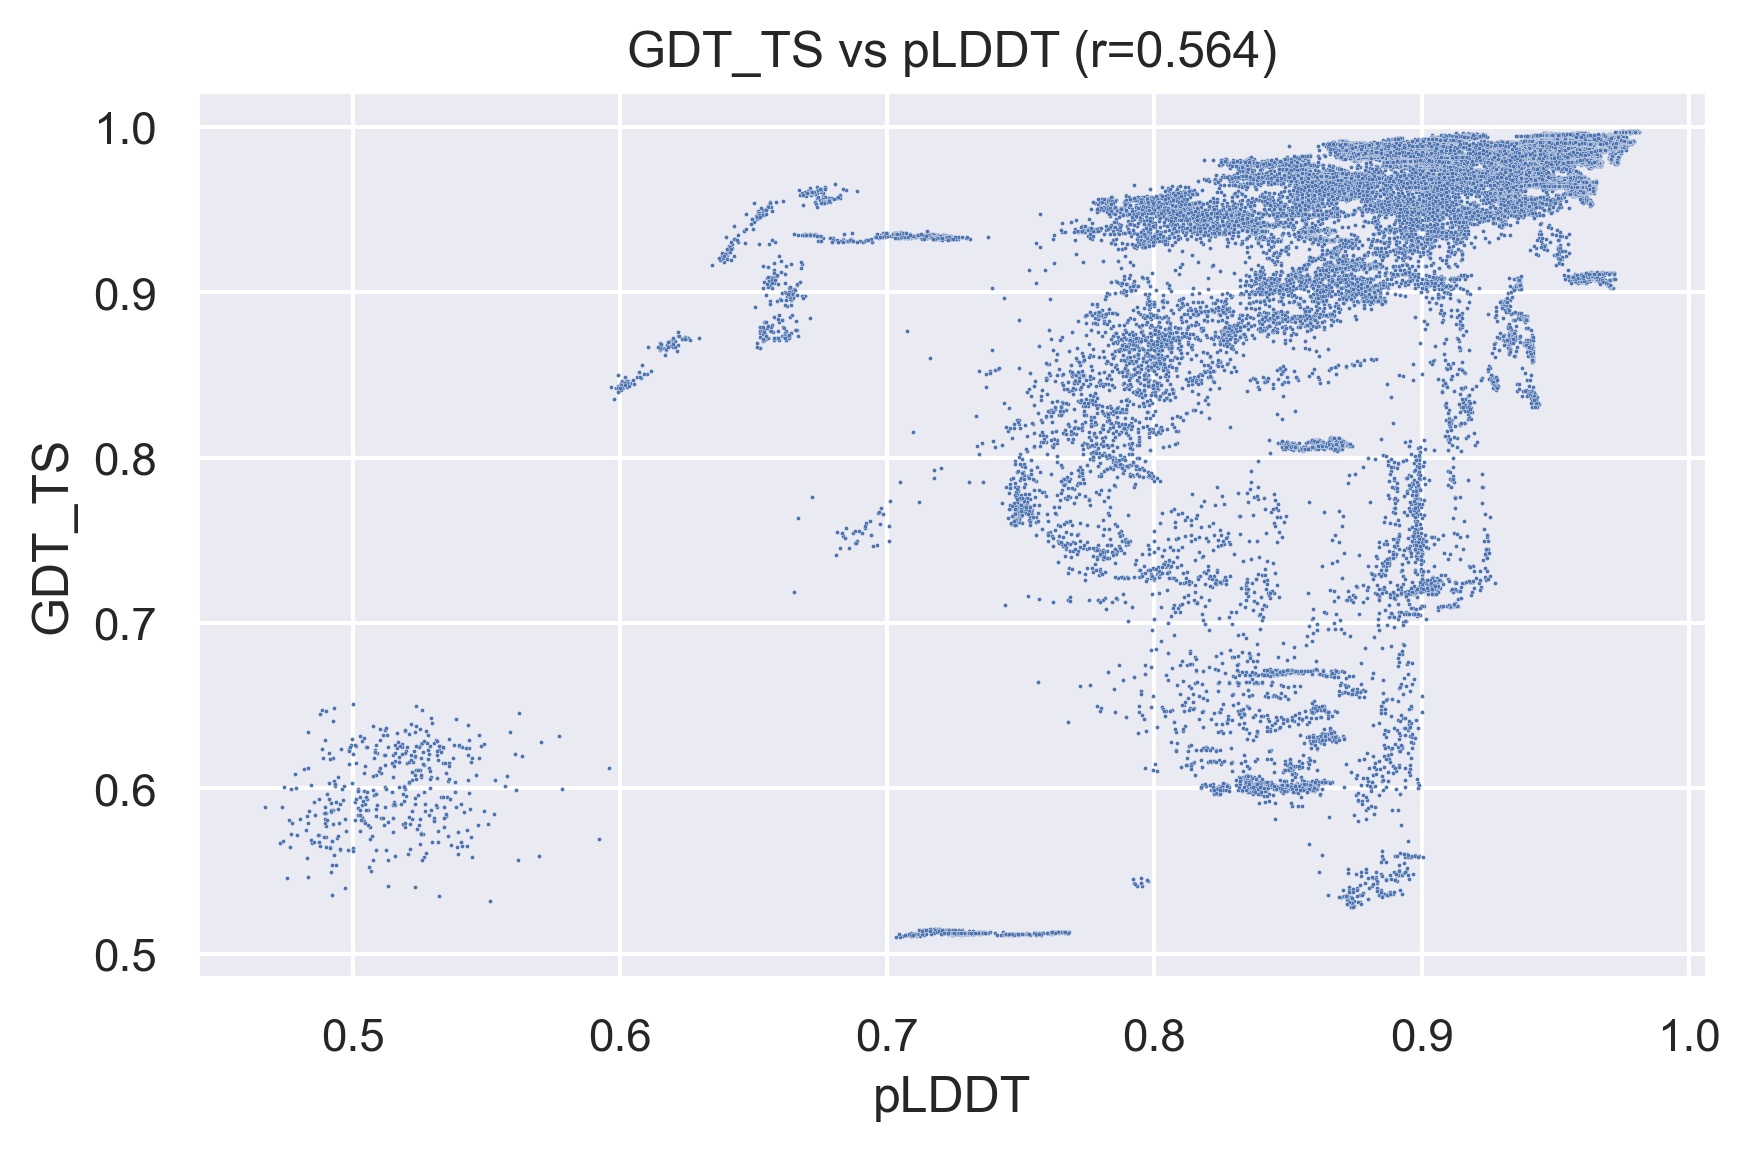

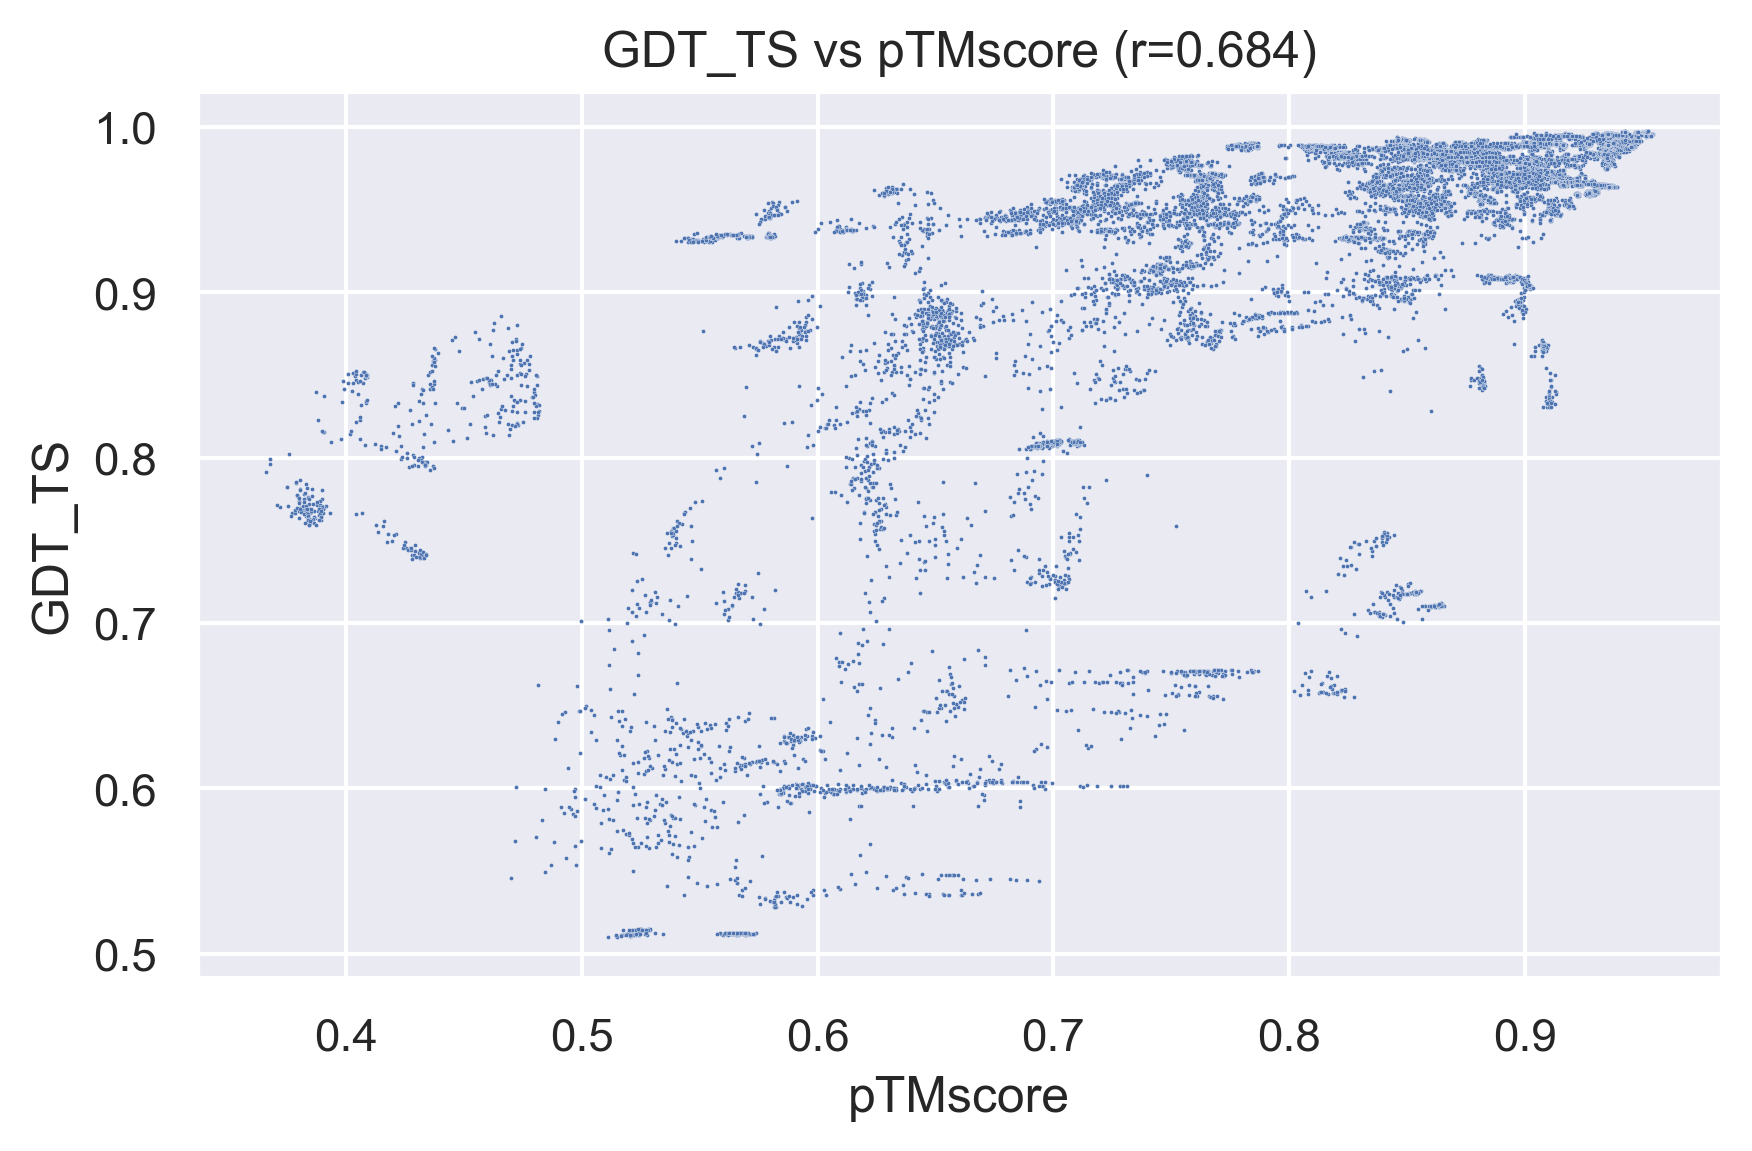

In [12]:
label = 'GDT_TS'
for method in methods:
    if method in ['DOPE', 'SOAP', 'SBROD']:
        continue
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=method, y=label, s=1)
    cc = df.corr()[label][method]
    plt.title(f'{label} vs {method} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

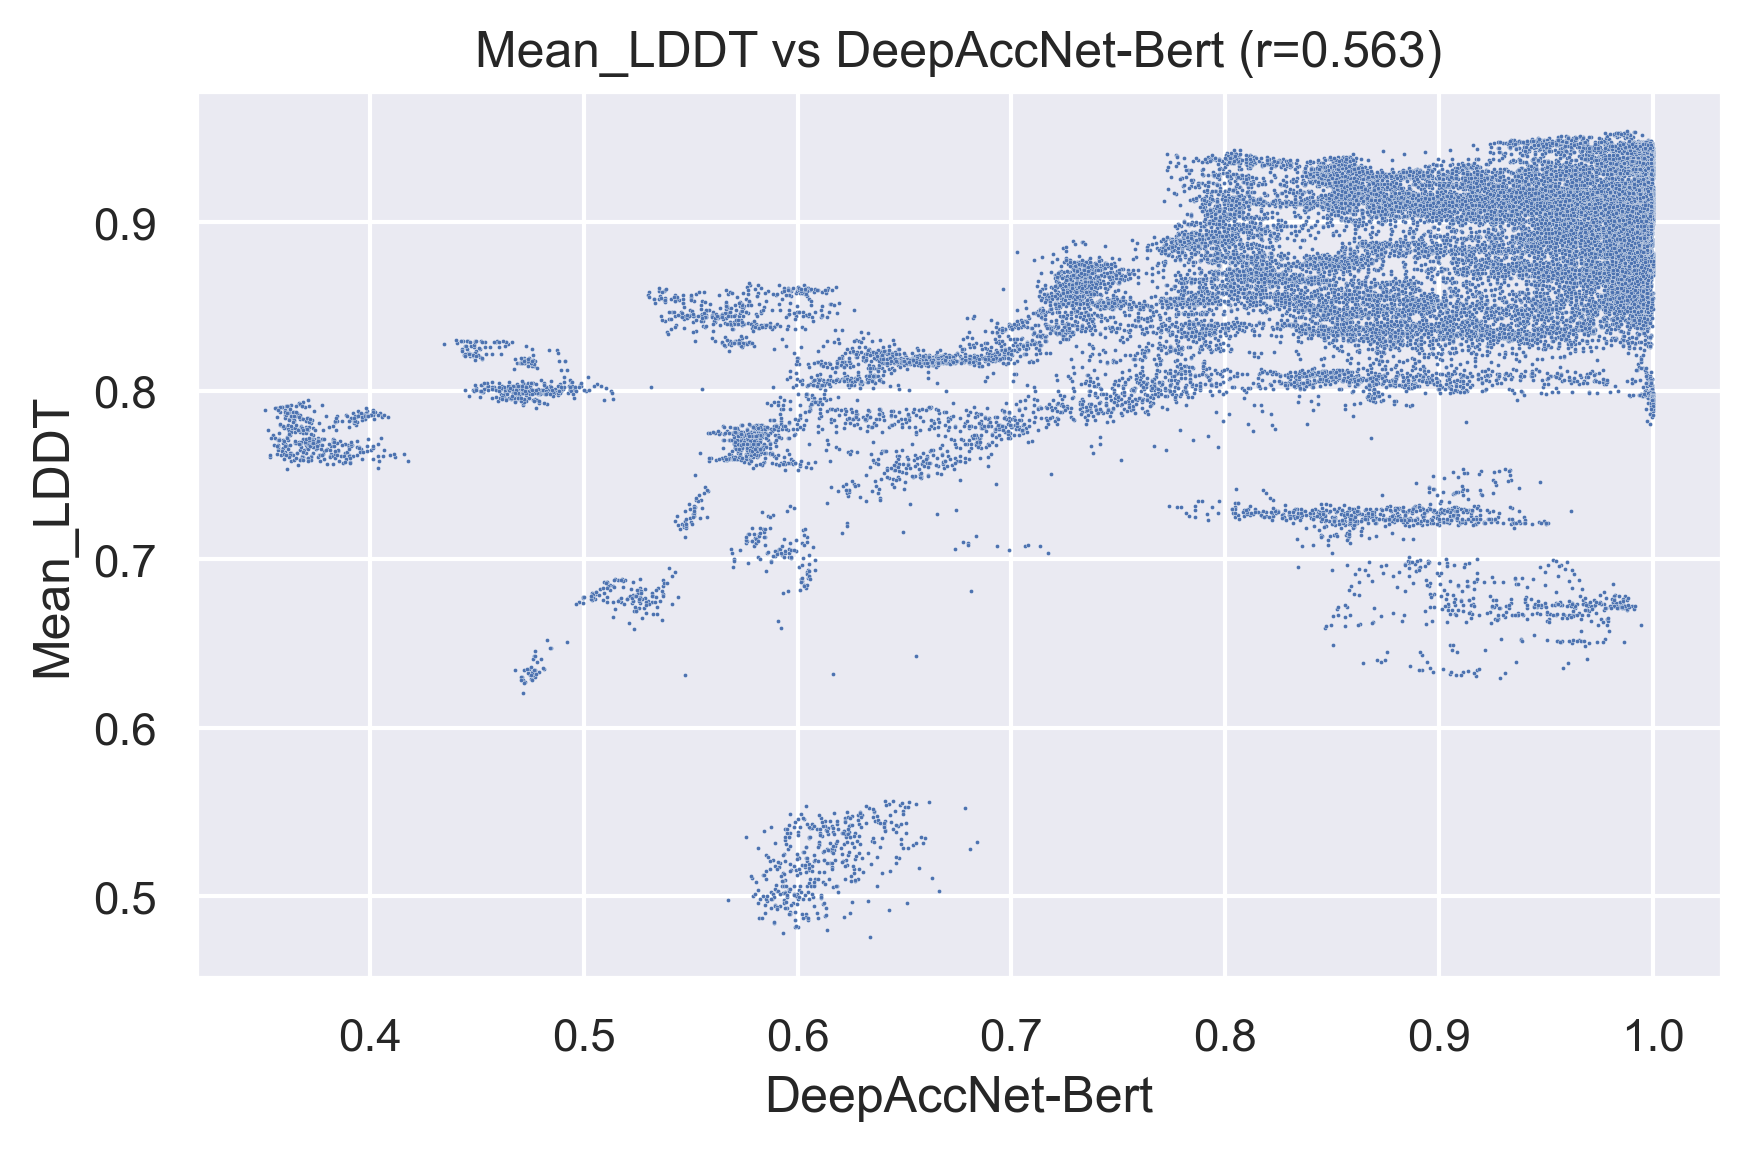

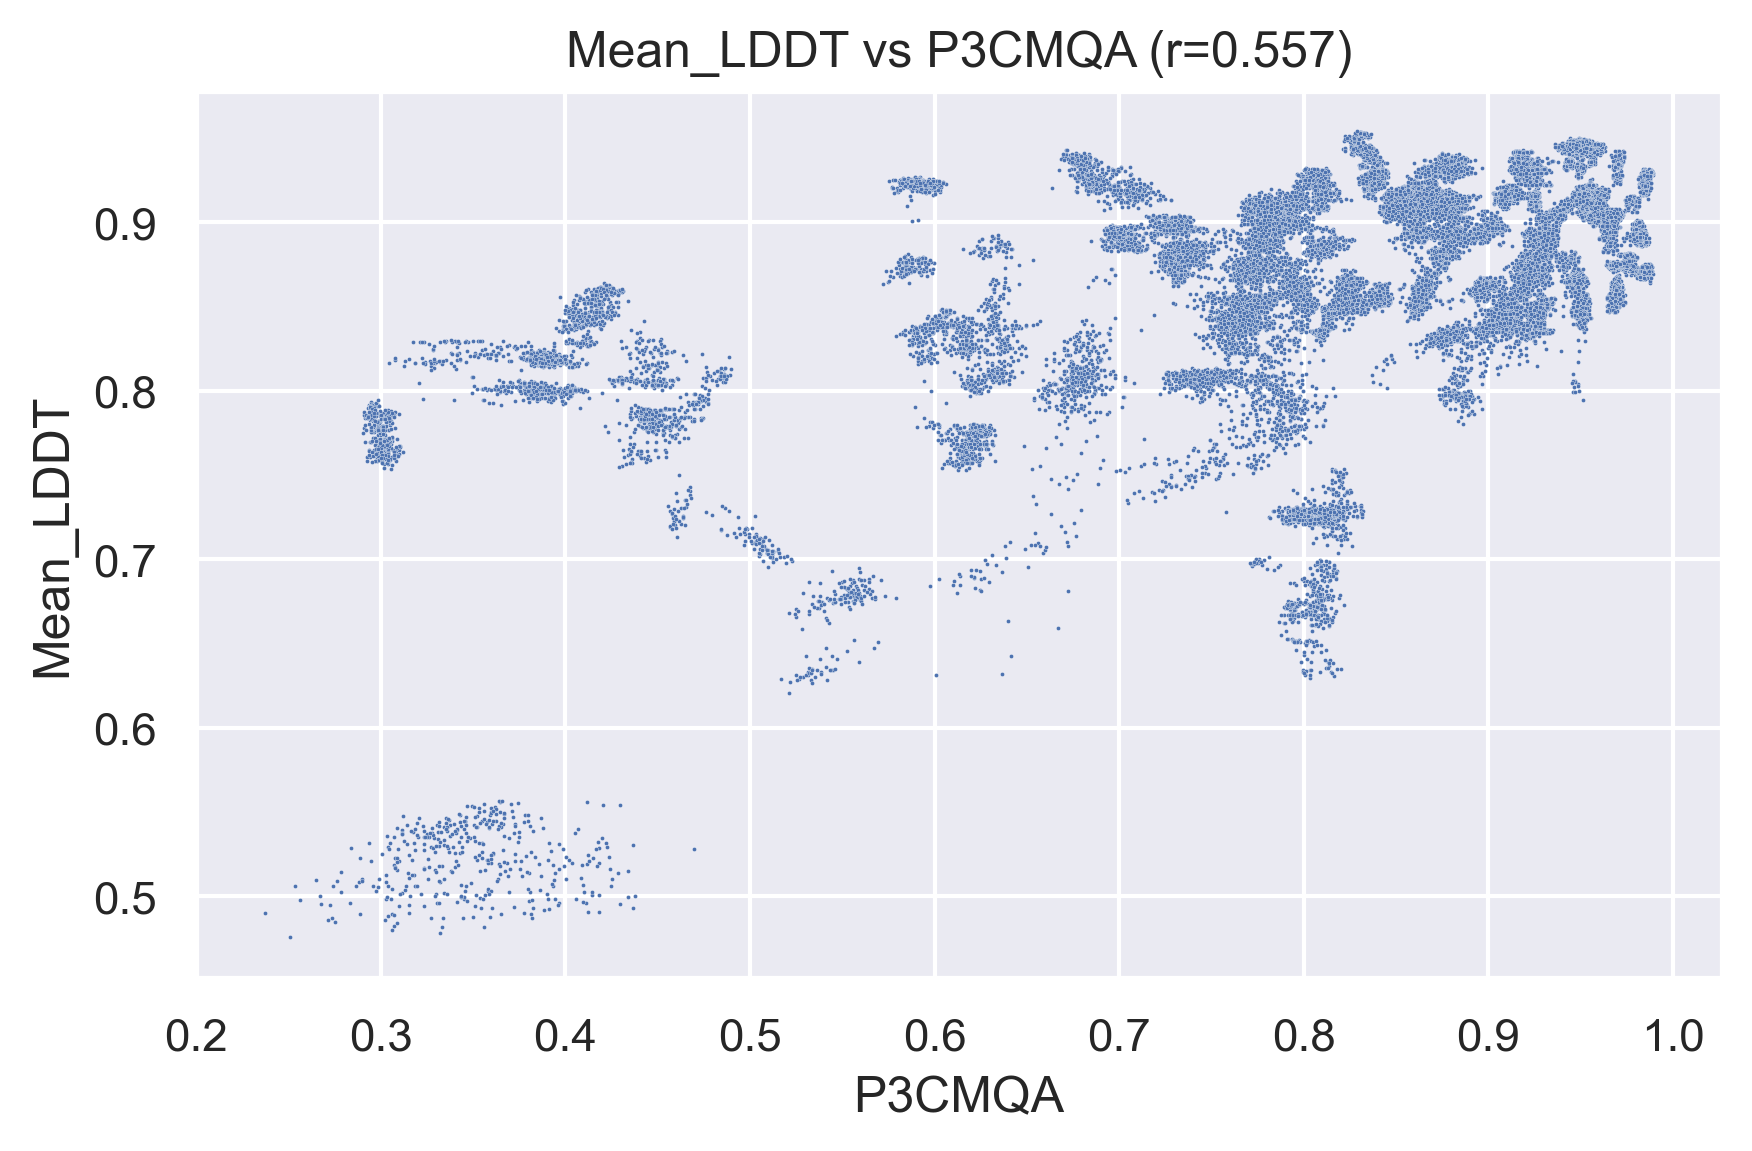

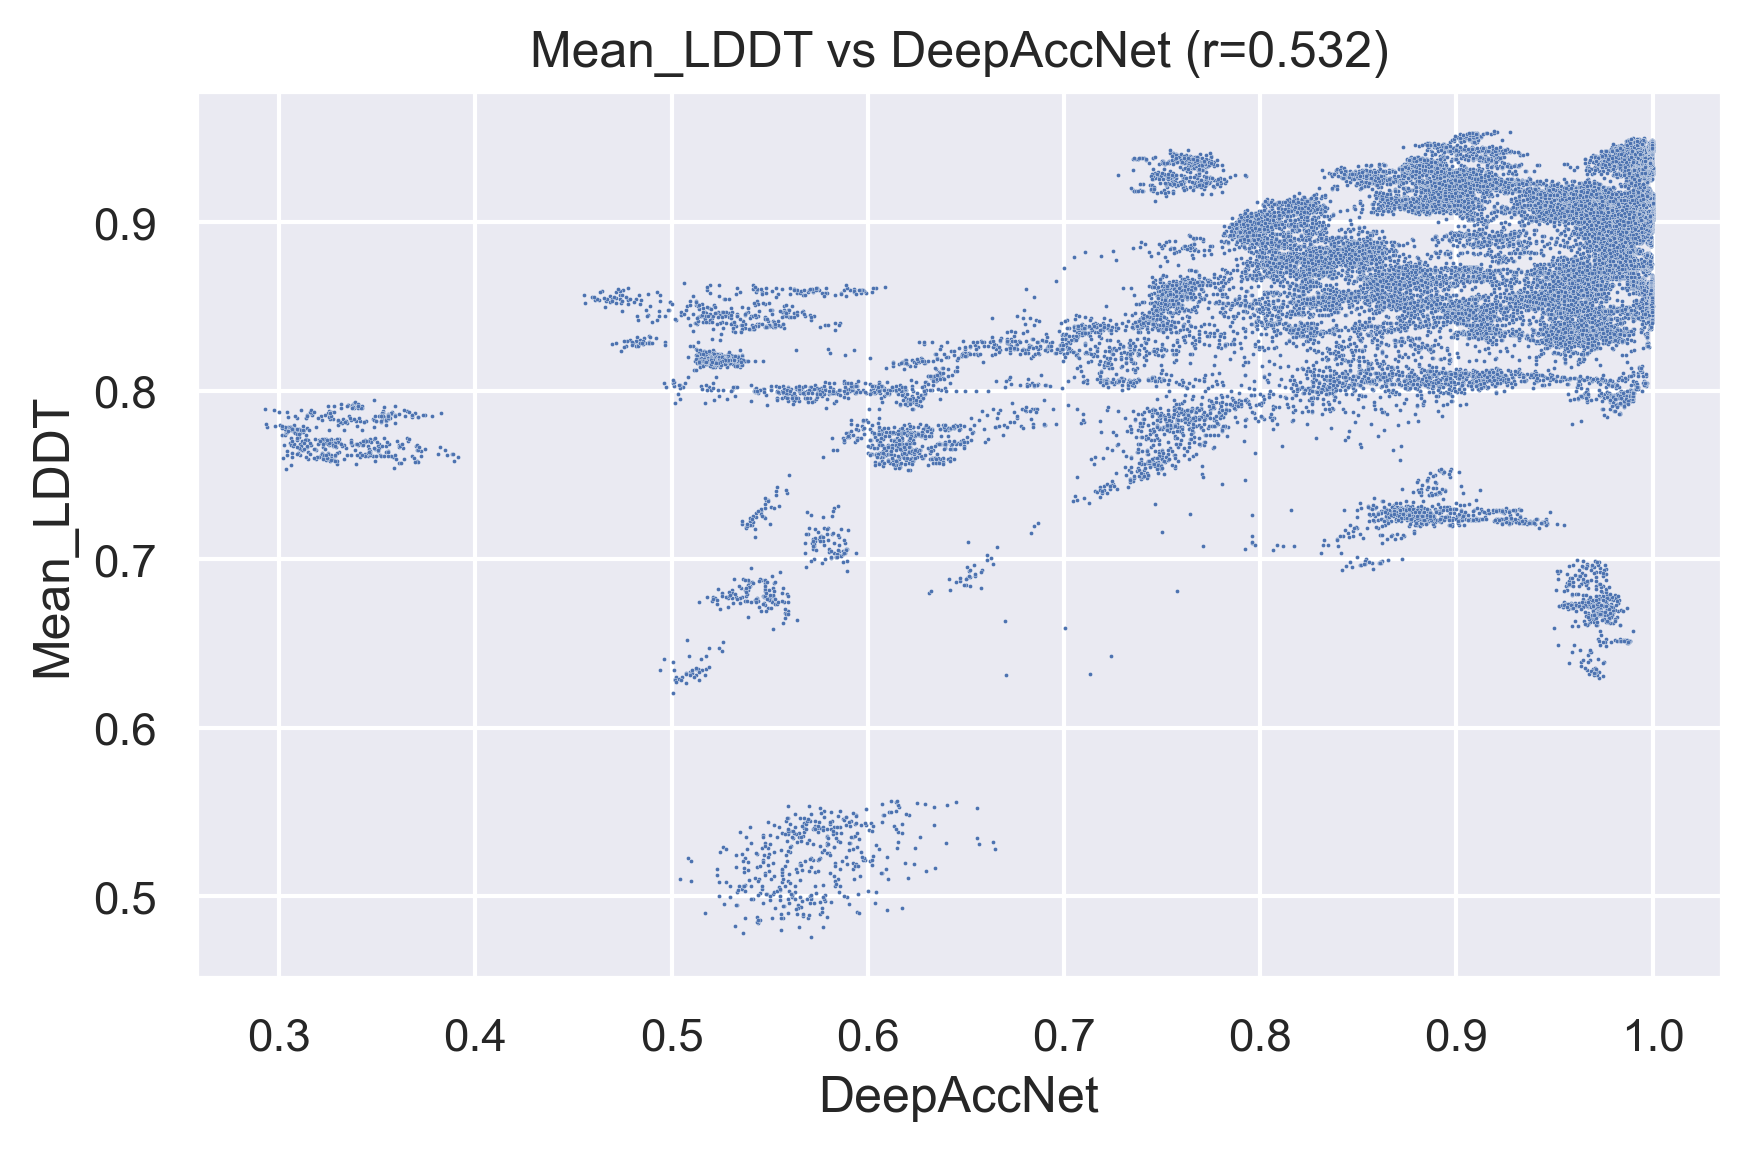

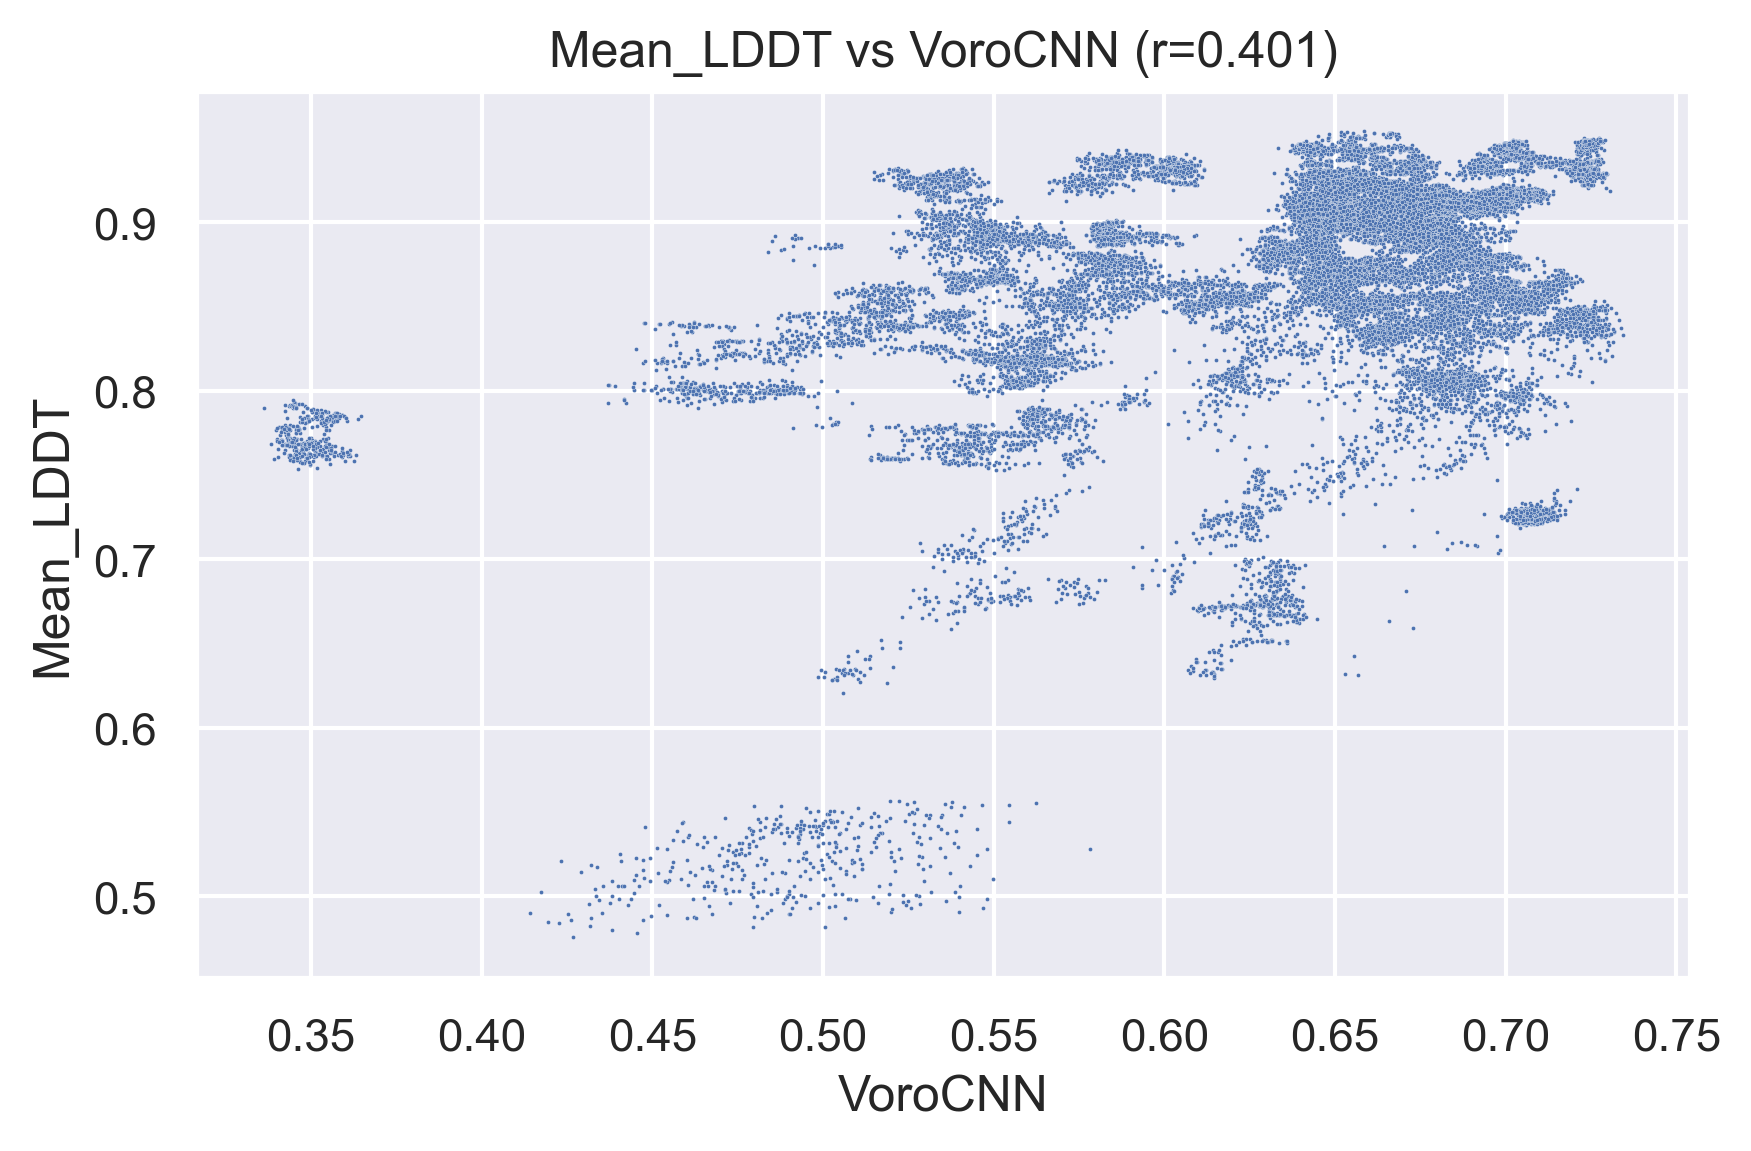

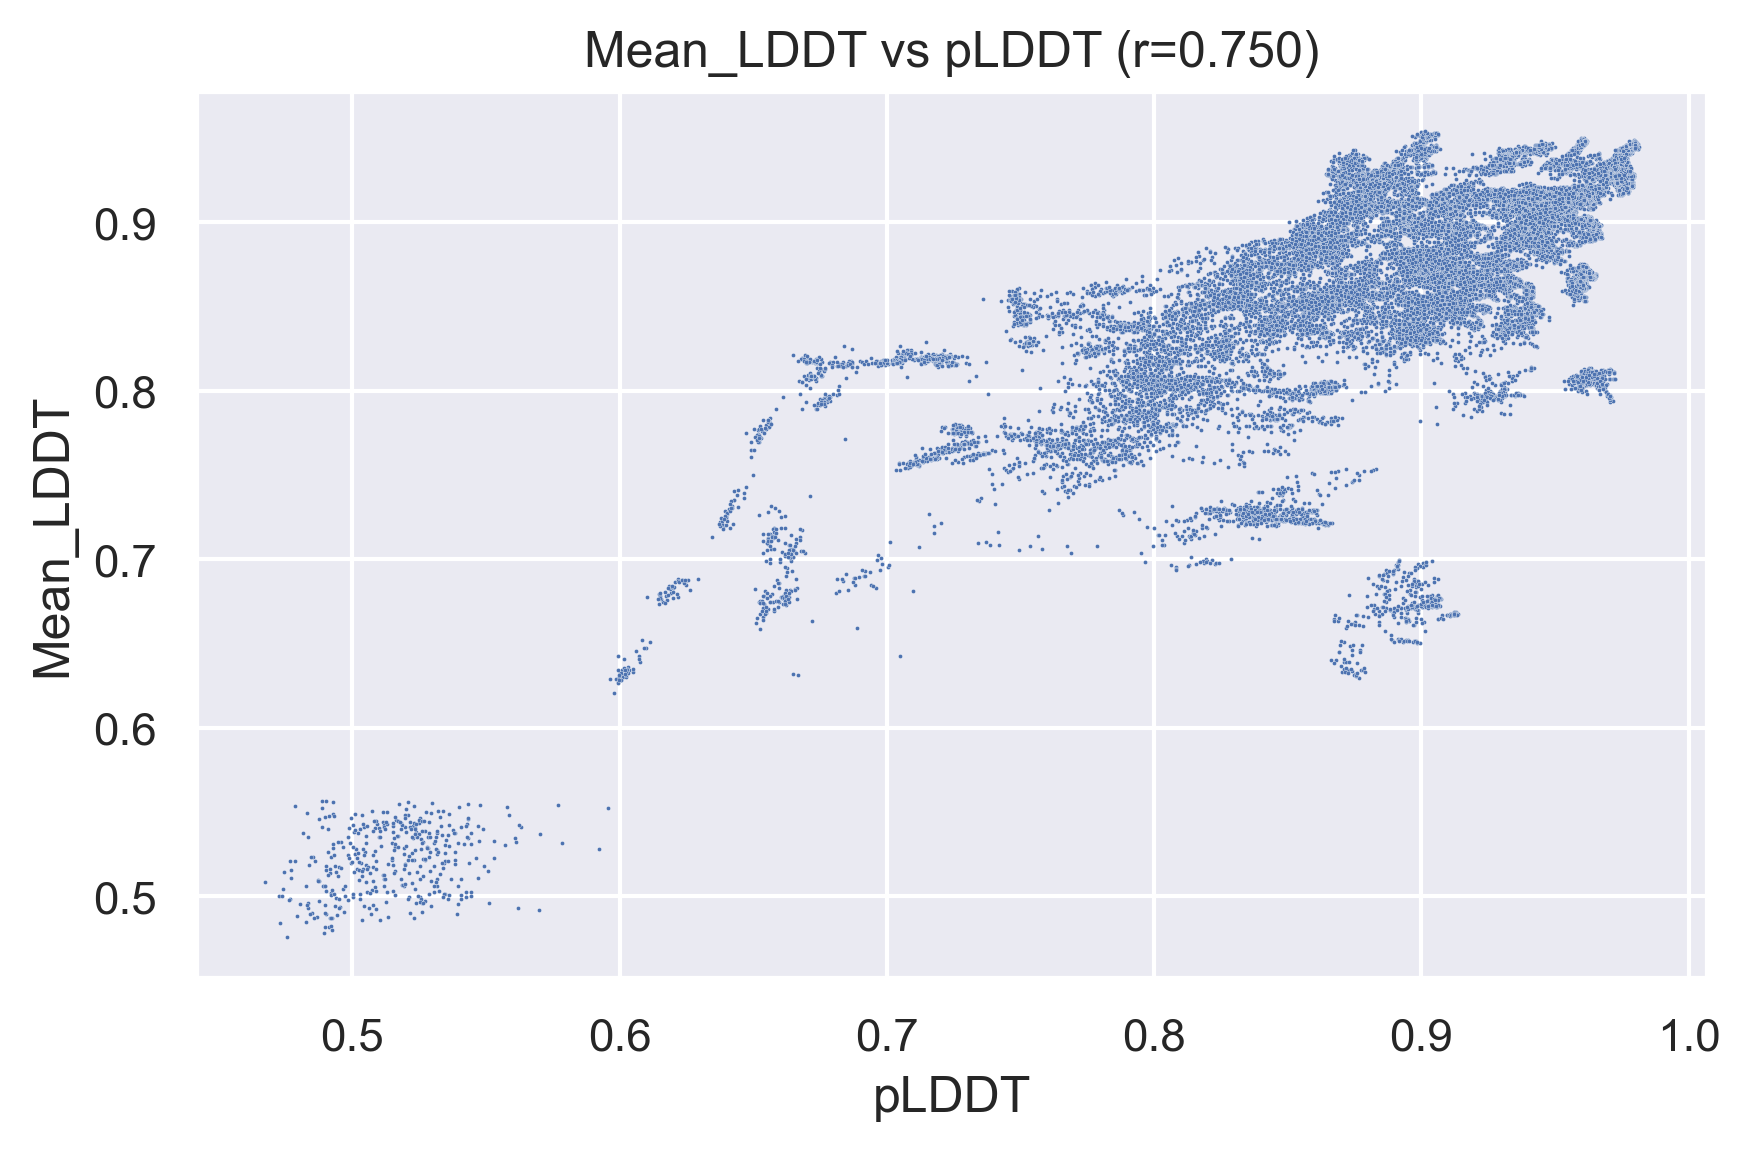

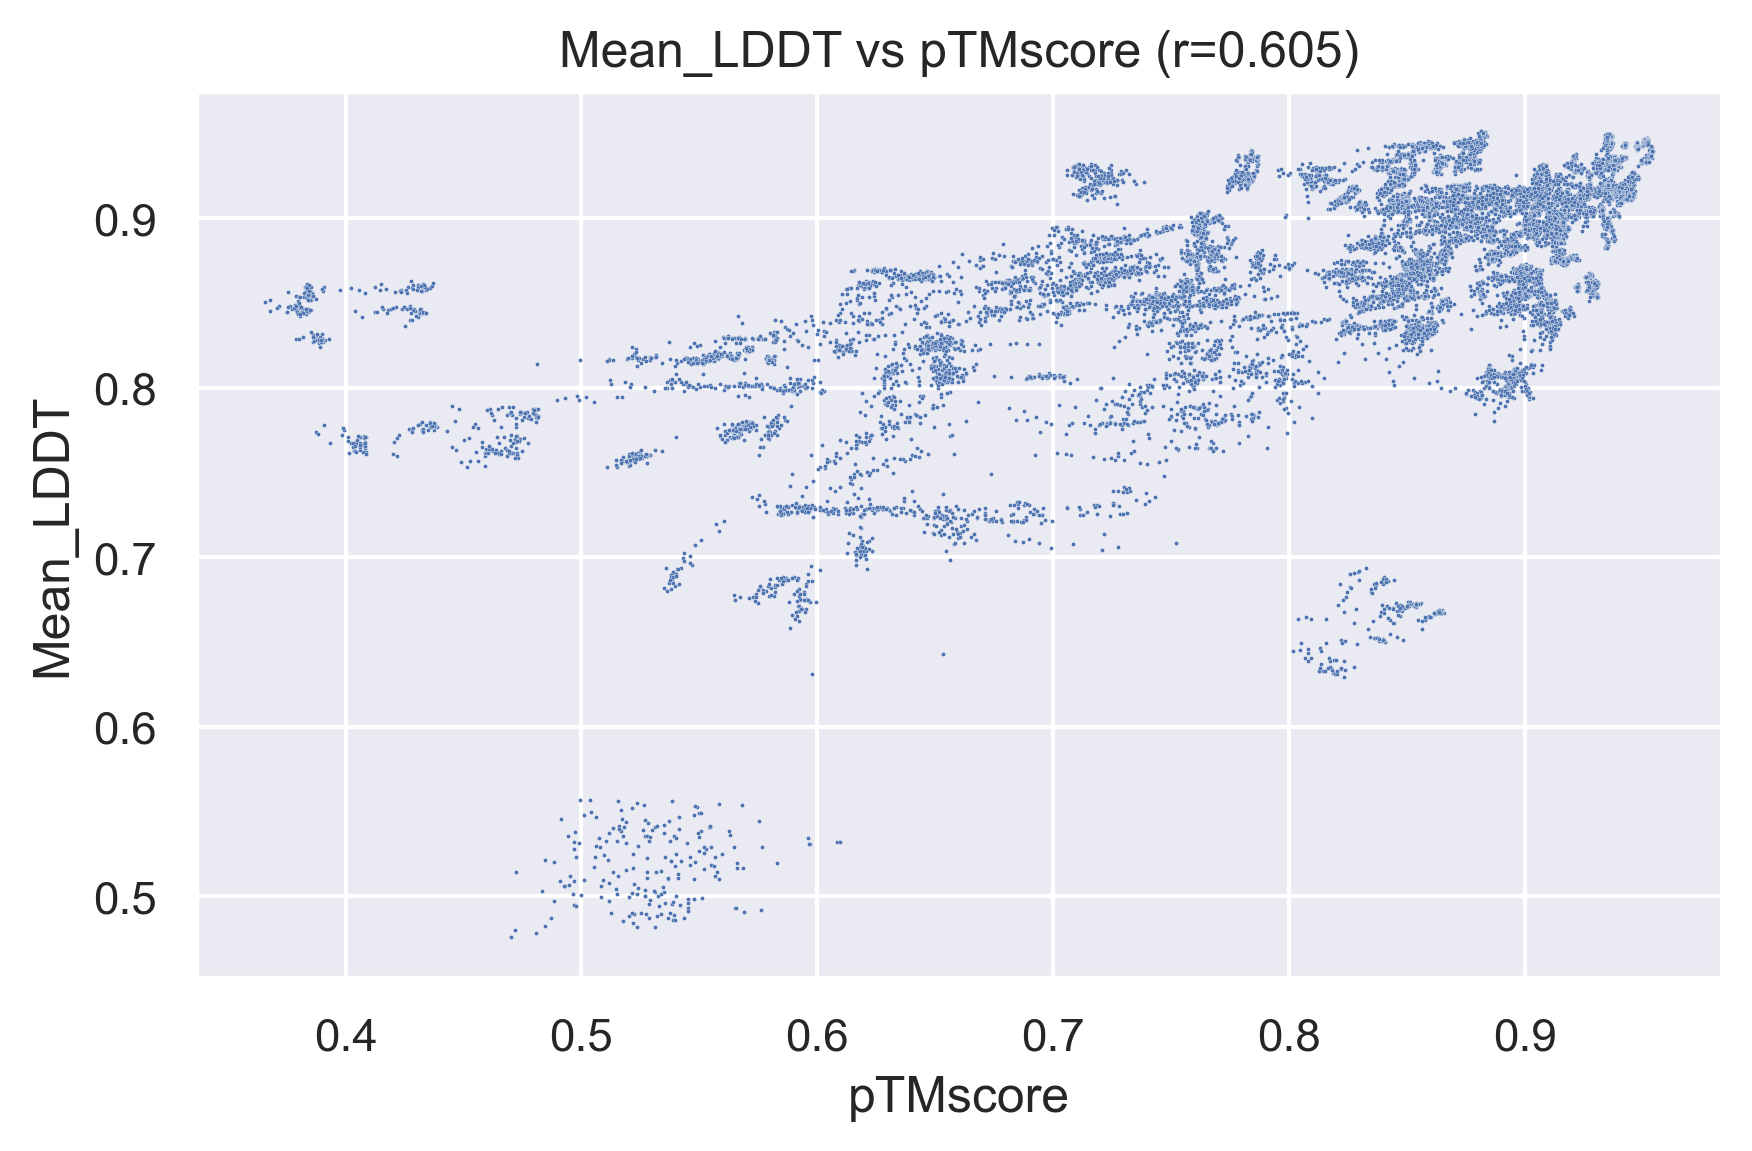

In [13]:
label = 'Mean_LDDT'
for method in methods:
    if method in ['DOPE', 'SOAP', 'SBROD']:
        continue
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=method, y=label, s=1)
    cc = df.corr()[label][method]
    plt.title(f'{label} vs {method} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

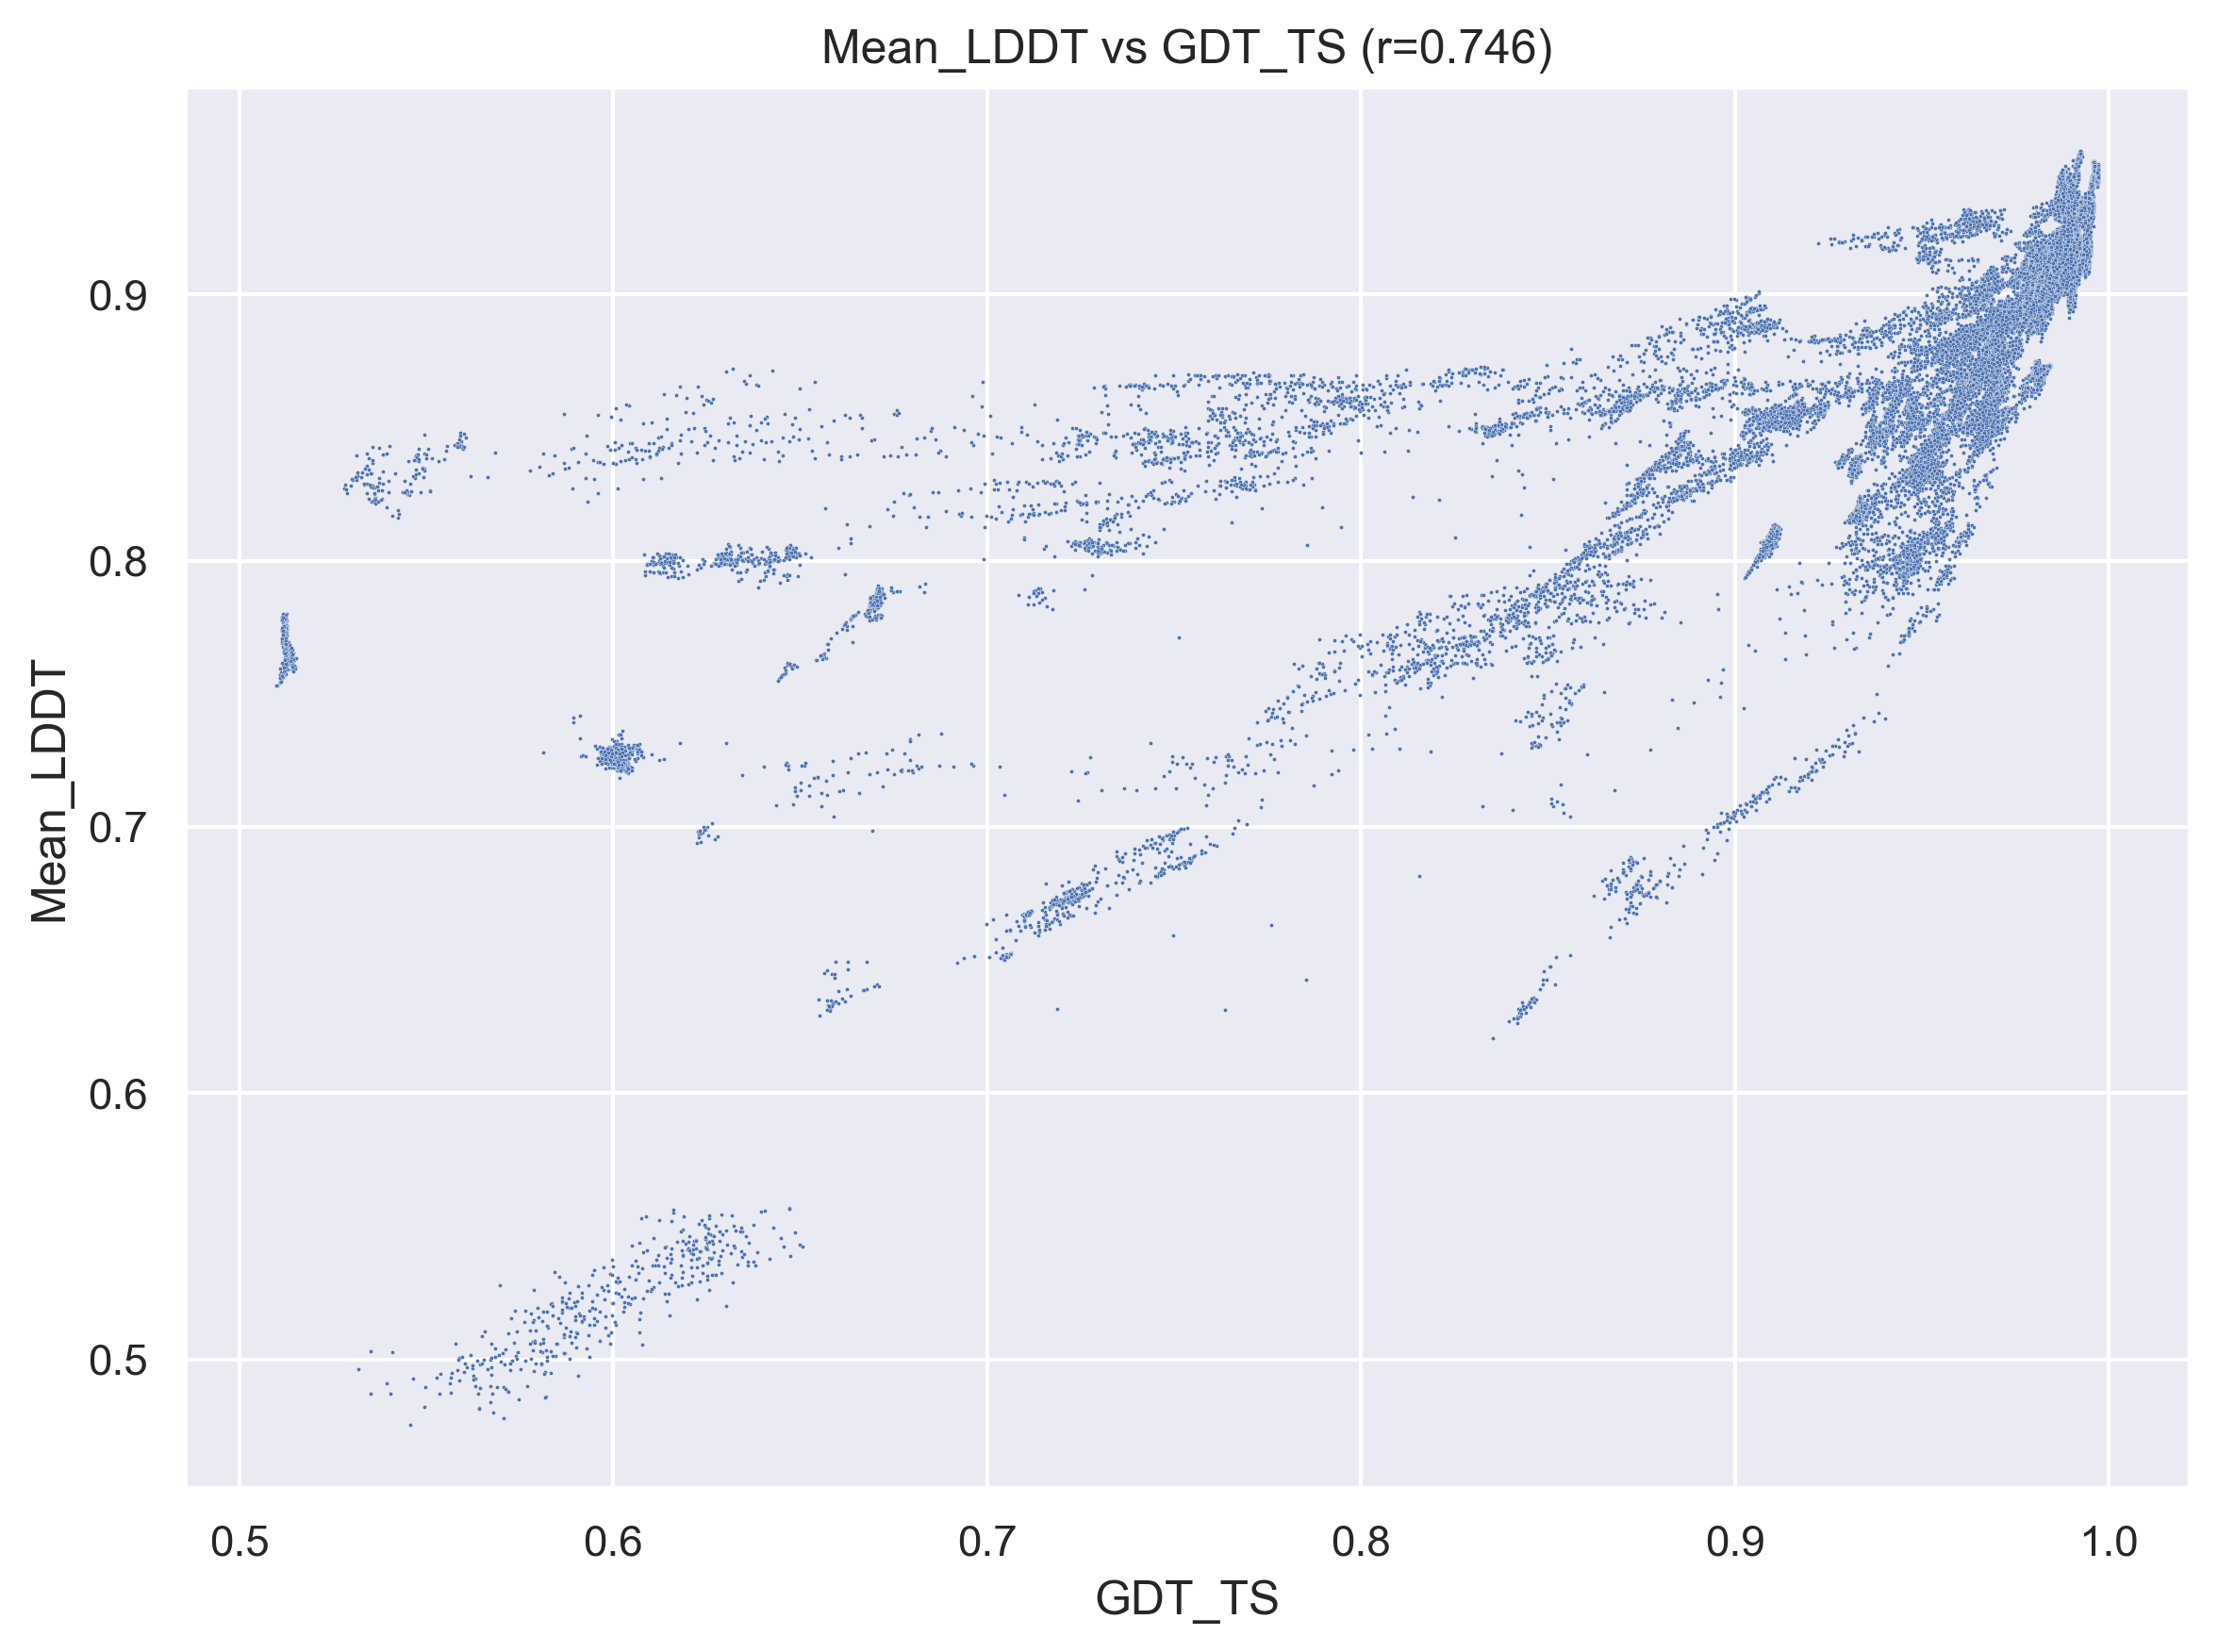

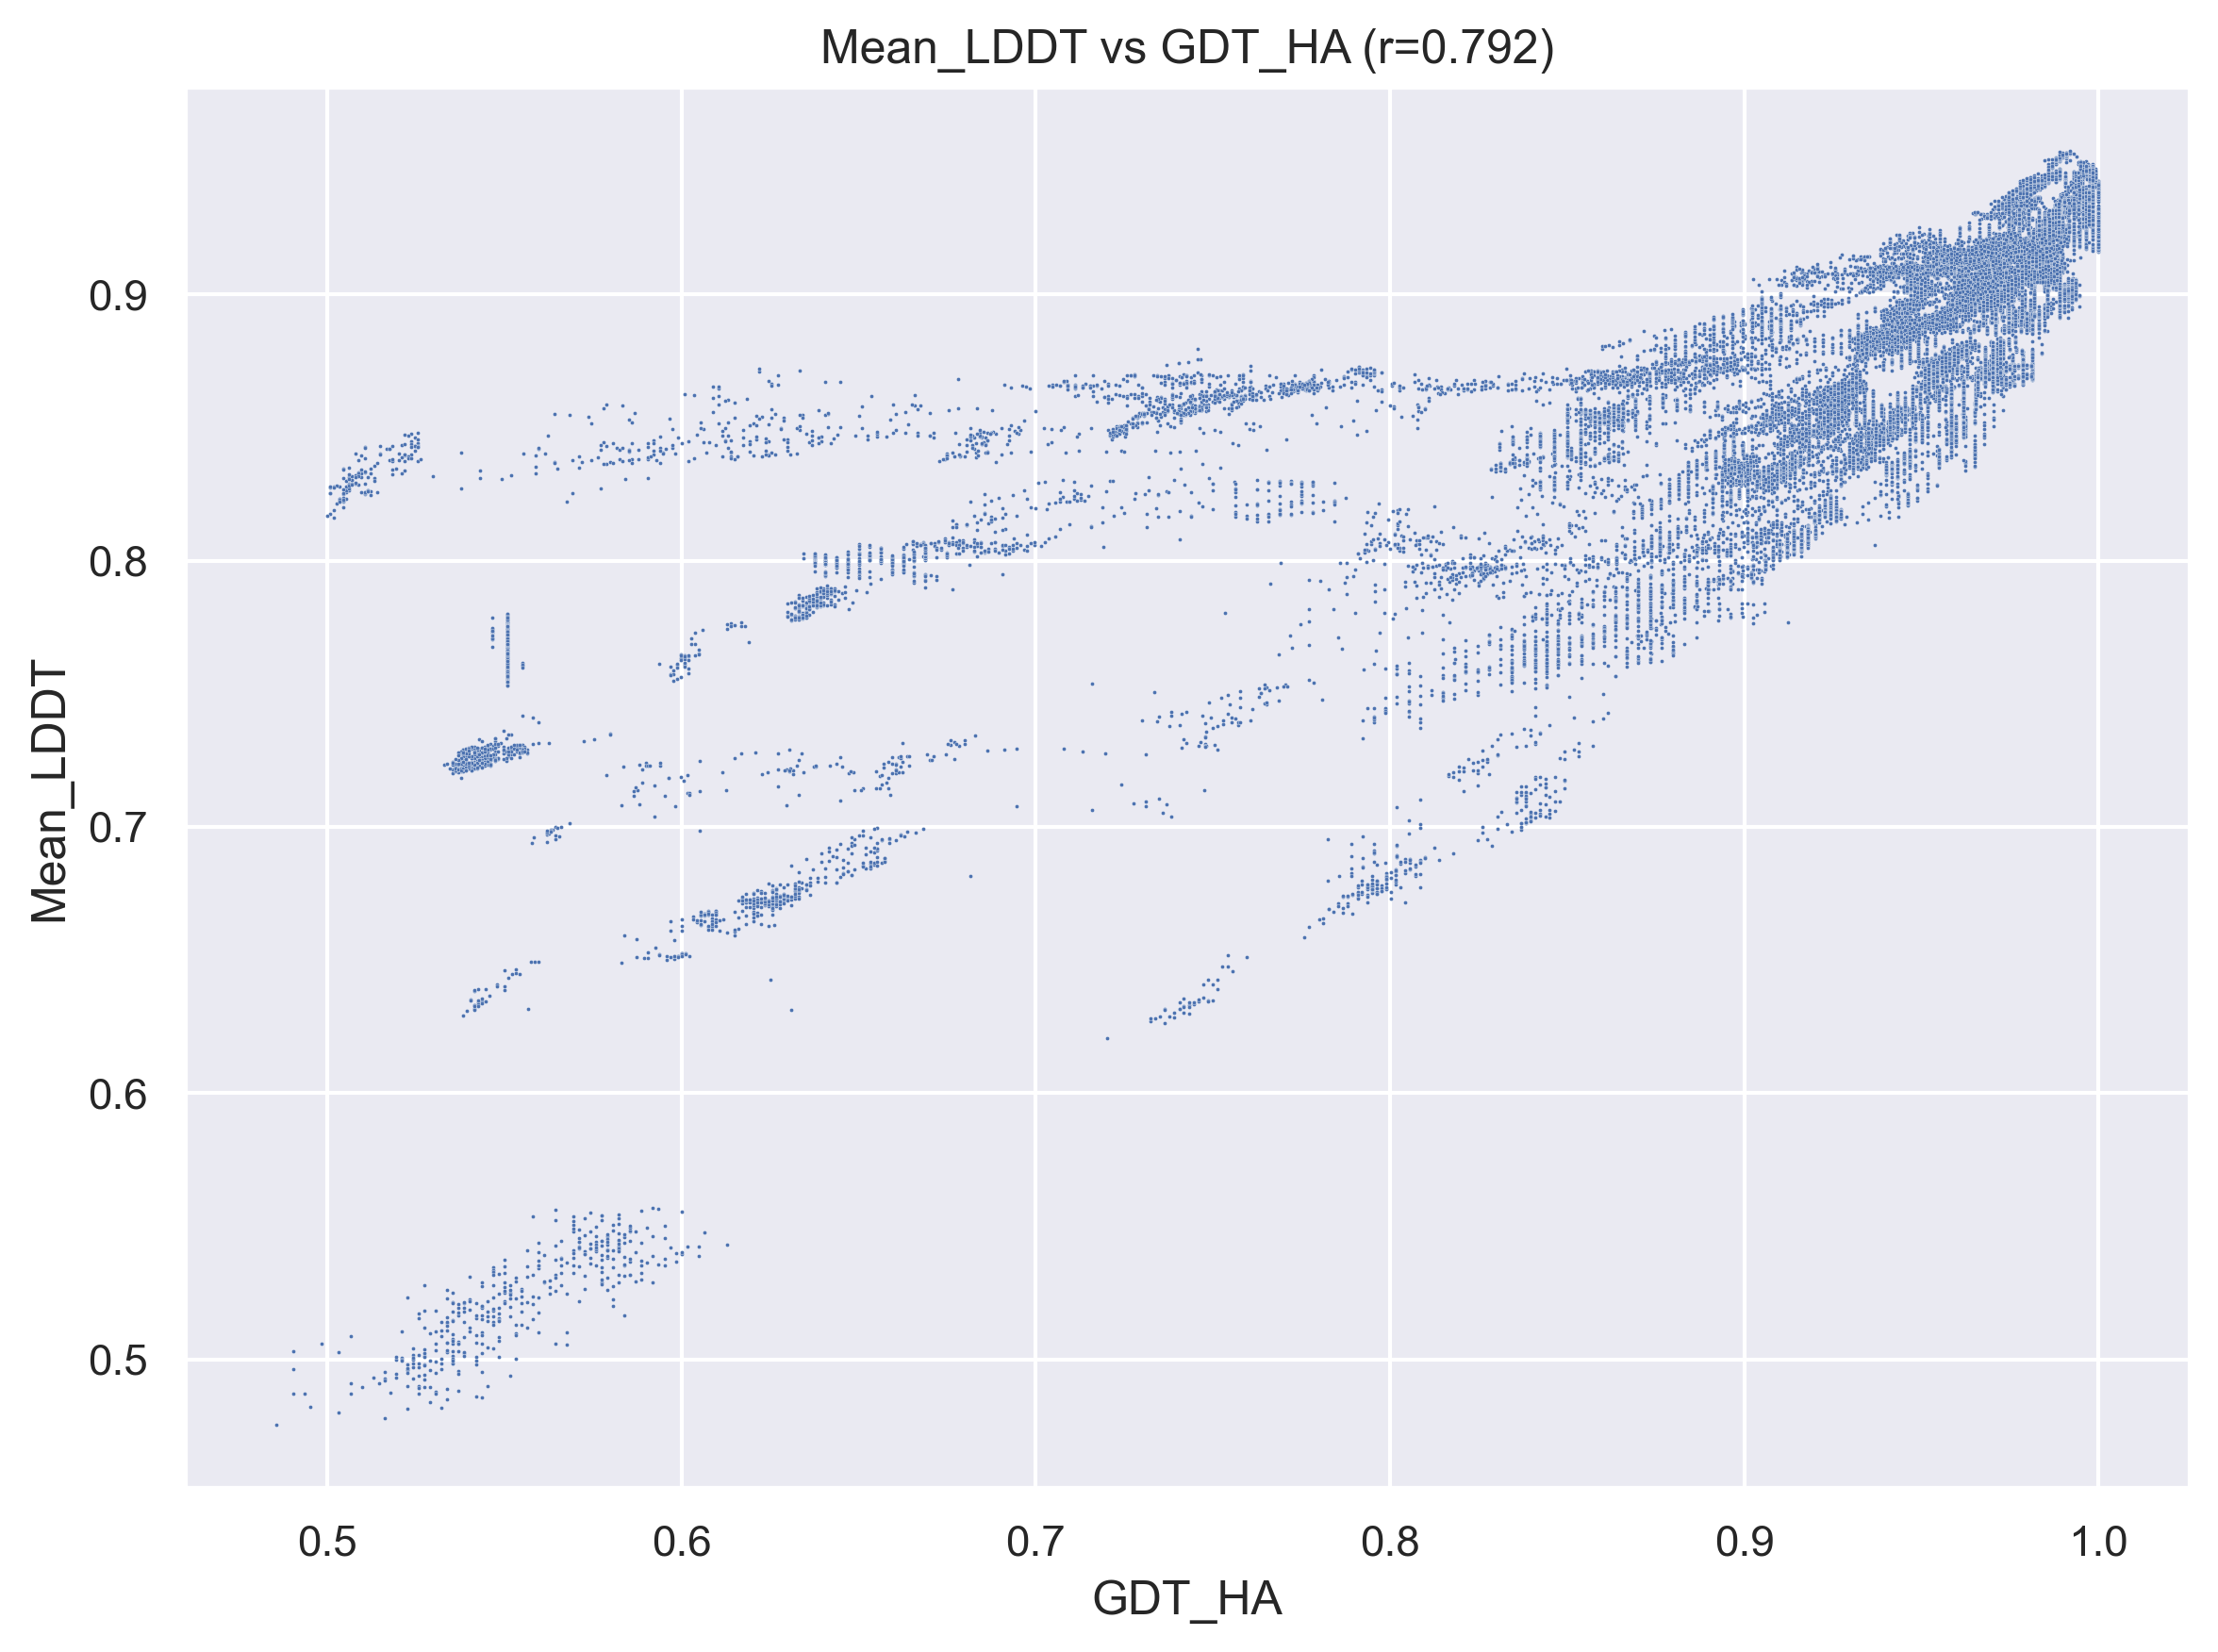

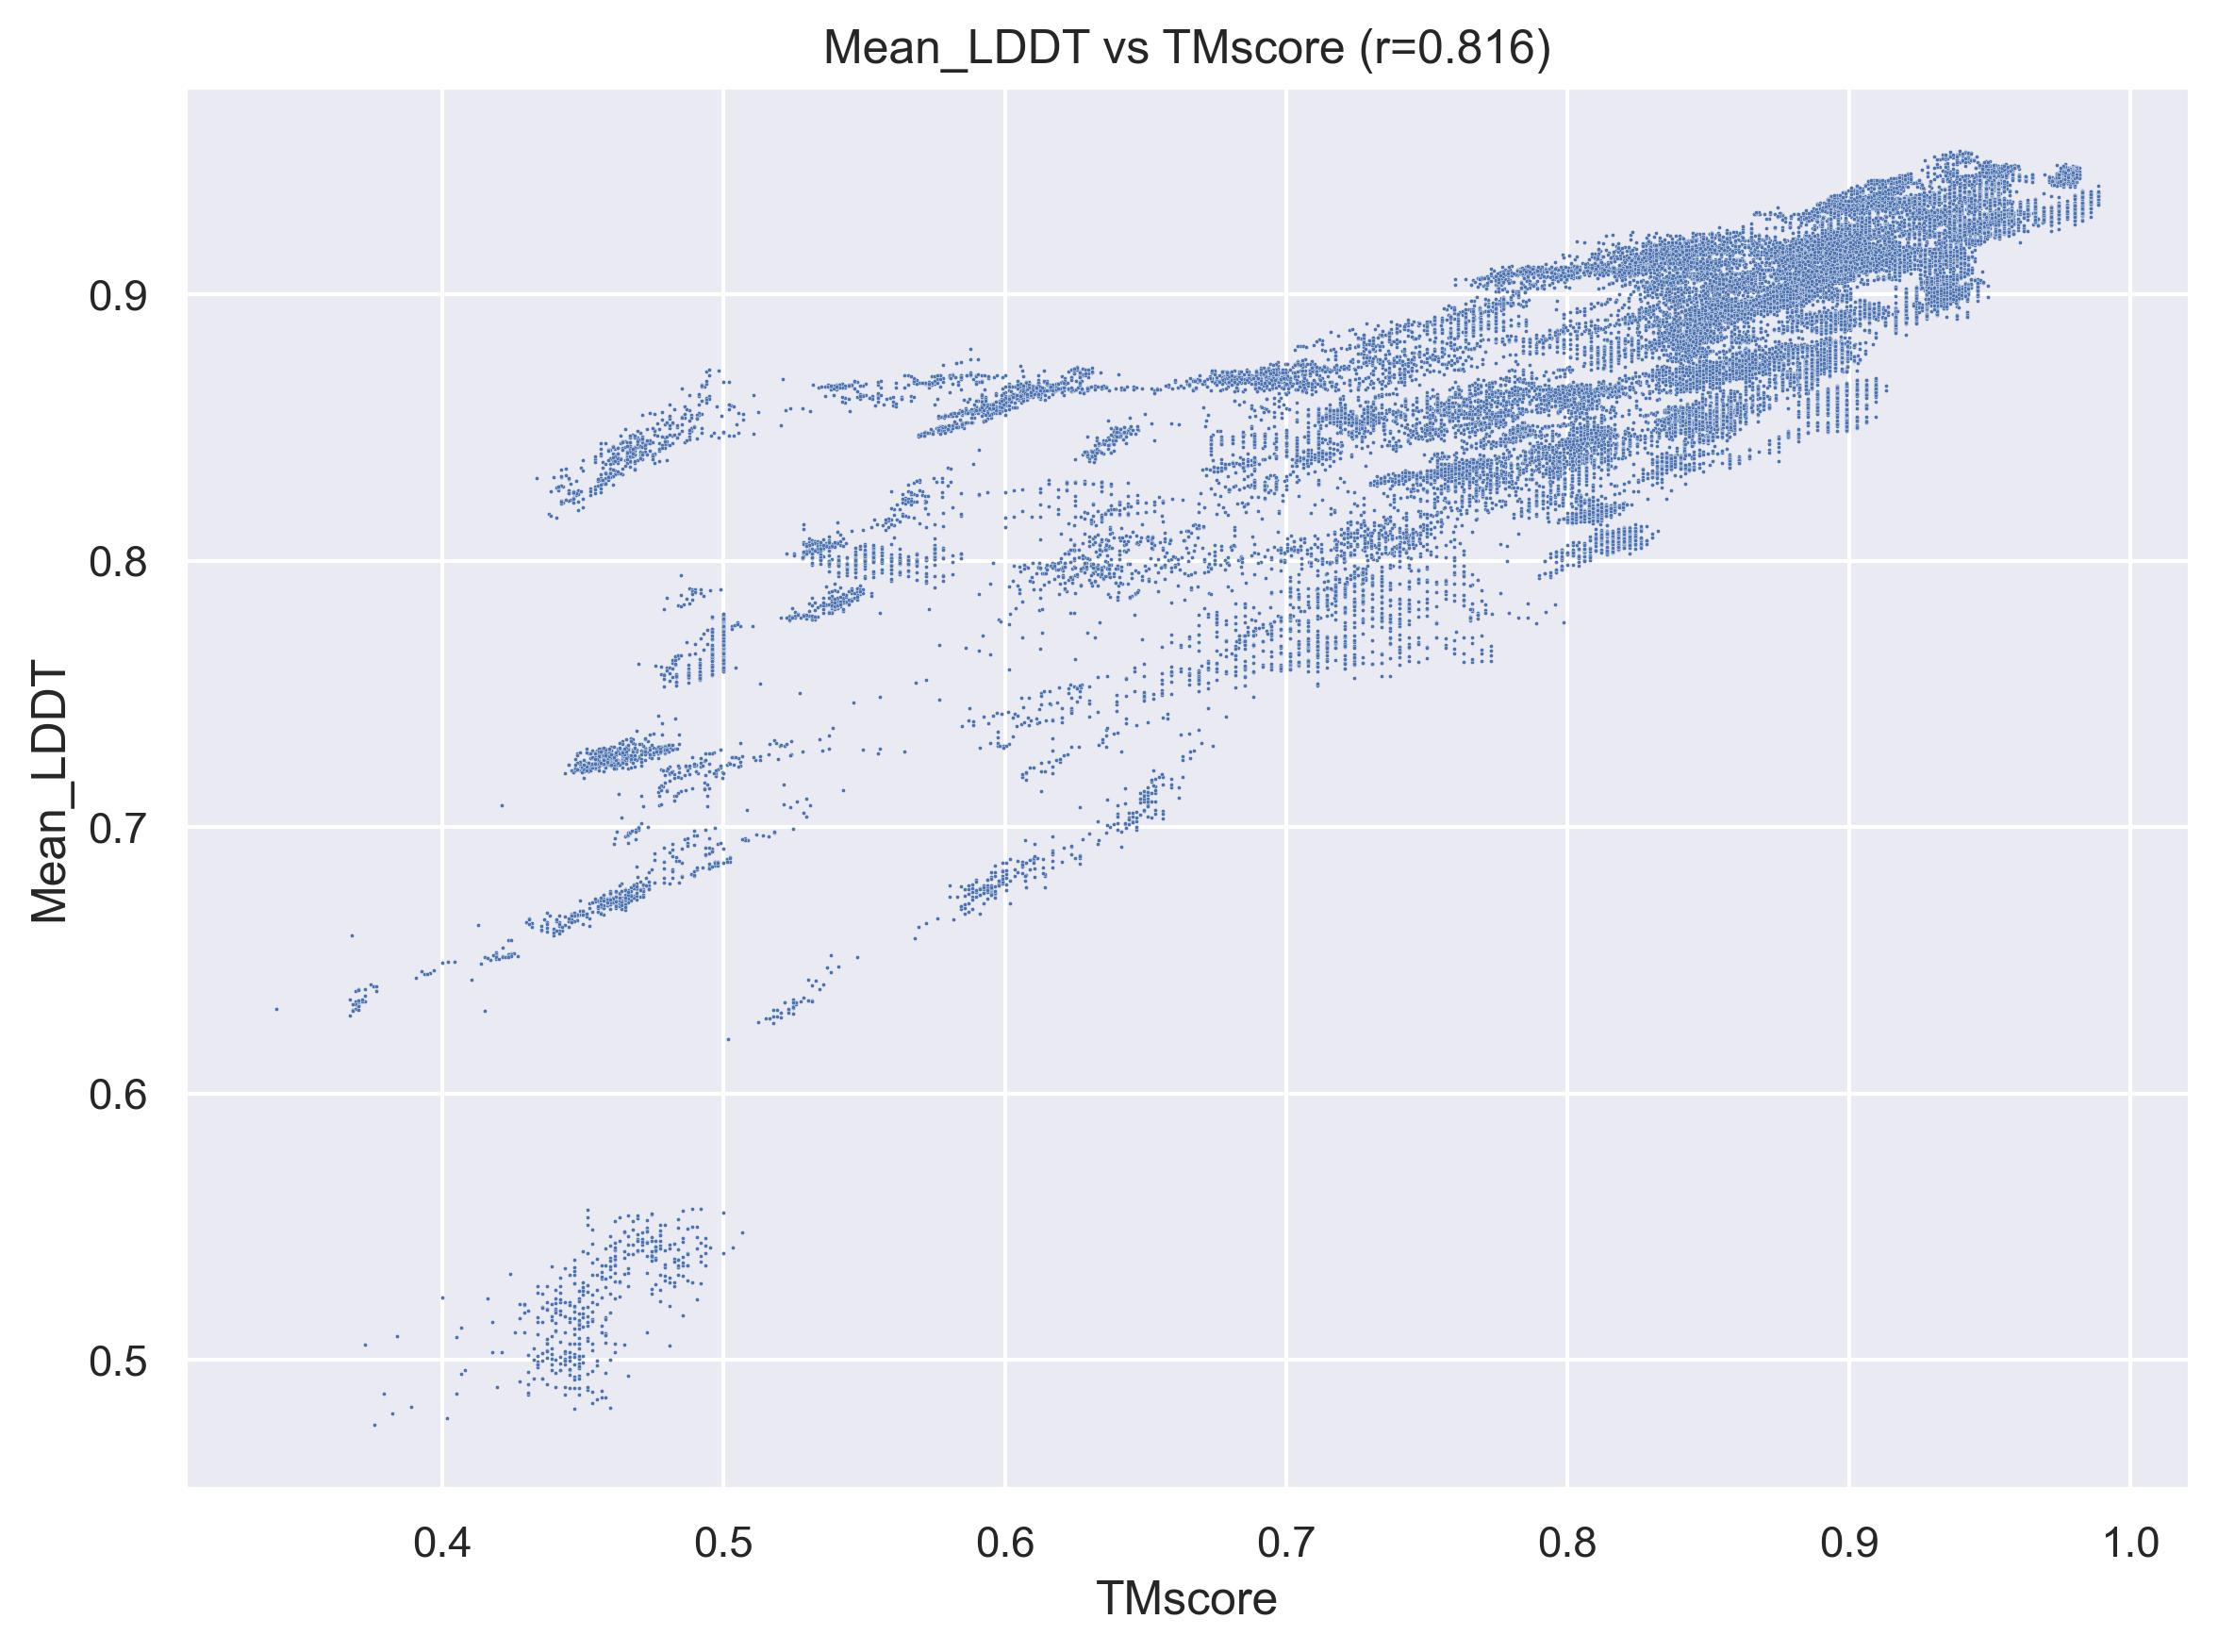

In [14]:
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()